# Customer Segmentation Analysis (ABC+XYZ) for FMCG-company JUPITER

## Methodology
Clients were segmented into **ABC** (by profitability) and **XYZ** (by revenue stability) groups across all operating regions.

### ABC Analysis (Profitability)
- **A** - Most profitable clients in region  
- **B** - Next profitable clients  
- **C** - Remaining clients 

### XYZ Analysis (Stability)
- **X** - Most stable revenue  
- **Y** - Moderately stable  
- **Z** - Highly volatile revenue  

## Segment Matrix & Recommended Actions

| Segment | Characteristics | Recommended Strategy |
|---------|----------------|----------------------|
| **AX** | High profit + Stable | Premium service, churn prevention |
| **AZ** | High profit + Unstable | Analyze causes, improve loyalty |
| **BX** | Medium profit + Stable | Growth potential, standard support |
| **BZ** | Medium profit + Unstable | Automation/prepayment solutions |
| **CZ** | Low profit + Unstable | Cost control, consider phase-out |

## Key Findings
- Prioritize **AX** clients (high-value + stable)
- Develop stabilization plans for **AZ/BZ** segments
- Optimize resource allocation by deprioritizing **CZ** clients


### Dataset Overview
- **Records**: 450 entrie)
- **Time Period**: Multi-year data (as indicated by `period_year`)
- **Coverage**: Contains data for multiple retail chains across different regi
- **Two main datasets:** nsv (sales information in rubles), tonns (sales information in tons)ons

*Clients segmentation is done in terms of both indicators sales in money(nsv) and tons. As a result, such analysis allows to develop more flexible interaction with clients (chains) and come up with more efficient resource optimization plan.*

### Importing packages and datasets

In [701]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
from matplotlib.ticker import FuncFormatter

In [702]:
nsv = pd.read_excel(r"C:\Users\ASUS\Downloads\nsv.xlsx")

In [703]:
tonns = pd.read_excel(r"C:\Users\ASUS\Downloads\tons.xlsx")

In [704]:
nsv.head()

,chain,region,period_year,nsv_LY,nsv_fact,vs LY %,vs LY
0,Agatron,Center,P1 2025,51.54,0.000000,0.000000,-51.540000
1,Agatron,Center,P2 2025,100.51,58.663294,0.583656,-41.846706
2,Agatron,Center,P3 2025,69.17,38.241612,0.552864,-30.928388
3,Agatron,Center,P4 2025,14.86,0.919590,0.061884,-13.940410
4,Agatron,Center,P5 2025,15.21,0.000000,0.000000,-15.210000


In [705]:
nsv.to_excel("nsv.xlsx", index=False)

In [706]:
tonns.to_excel("tons.xlsx", index=False)

In [707]:
nsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chain        450 non-null    object 
 1   region       450 non-null    object 
 2   period_year  450 non-null    object 
 3   nsv_LY       450 non-null    float64
 4   nsv_fact     426 non-null    float64
 5   vs LY %      406 non-null    float64
 6   vs LY        450 non-null    float64
dtypes: float64(4), object(3)
memory usage: 24.7+ KB


In [708]:
nsv['chain'].unique()

array(['Agatron', 'Astra', 'Briz', 'Orbiton', 'Nebula', 'Gravix',
       'Hypernova', 'Intertorg', 'Quasar', 'Orbita', 'Magnara', 'Rayna',
       'Maxar', 'Meteor', 'Lunex', 'O-Key', 'Rubix', 'Tandar', 'Vega',
       'X5 Nova'], dtype=object)

In [709]:
nsv['nsv_fact'] = nsv['nsv_fact'].fillna(0)

In [710]:
nsv['vs LY %'] = nsv['nsv_fact'] / nsv['nsv_LY']

In [711]:
nsv['vs LY %'] = nsv['vs LY %'] * 100

In [712]:
nsv['vs LY'] = (nsv['nsv_fact'] - nsv['nsv_LY']) / nsv['nsv_LY'] * 100

In [713]:
nsv = nsv.loc[~nsv['vs LY %'].isna()]

In [714]:
nsv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 449
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chain        420 non-null    object 
 1   region       420 non-null    object 
 2   period_year  420 non-null    object 
 3   nsv_LY       420 non-null    float64
 4   nsv_fact     420 non-null    float64
 5   vs LY %      420 non-null    float64
 6   vs LY        420 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB


In [715]:
tonns.head()

,chain,region,period_year,tonns_LY,tonns_fact,vs LY %,vs LY
0,Agatron,Center,P1 2025,74.30,0.000000,0.000000,-74.300000
1,Agatron,Center,P2 2025,196.07,111.701528,0.569702,-84.368472
2,Agatron,Center,P3 2025,148.73,74.122924,0.498372,-74.607076
3,Agatron,Center,P4 2025,26.67,-0.054720,-0.002052,-26.724720
4,Agatron,Center,P5 2025,14.15,0.000000,0.000000,-14.150000


In [716]:
tonns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chain        450 non-null    object 
 1   region       450 non-null    object 
 2   period_year  450 non-null    object 
 3   tonns_LY     450 non-null    float64
 4   tonns_fact   426 non-null    float64
 5   vs LY %      408 non-null    float64
 6   vs LY        450 non-null    float64
dtypes: float64(4), object(3)
memory usage: 24.7+ KB


In [717]:
tonns['tonns_fact'] = tonns['tonns_fact'].fillna(0)

In [718]:
tonns['vs LY %'] = tonns['tonns_fact'] / tonns['tonns_LY']

In [719]:
tonns['vs LY %'] = tonns['vs LY %'] * 100

In [720]:
tonns['vs LY'] = (tonns['tonns_fact'] / tonns['tonns_LY']) / tonns['tonns_LY'] * 100

In [721]:
tonns = tonns.loc[~tonns['vs LY %'].isna()]

In [722]:
tonns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 449
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chain        420 non-null    object 
 1   region       420 non-null    object 
 2   period_year  420 non-null    object 
 3   tonns_LY     420 non-null    float64
 4   tonns_fact   420 non-null    float64
 5   vs LY %      420 non-null    float64
 6   vs LY        420 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB


### Исследовательский анализ

In [723]:
pd.DataFrame(nsv.groupby('region')['nsv_fact'].sum().sort_values(ascending=False).reset_index())

,region,nsv_fact
0,Moscow,9818.703713
1,South,8935.846507
2,Center,8170.952851
3,North,5579.778704
4,Siberia,3841.542134
5,East,2595.619542


In [724]:
pivot_data_nsv = nsv.pivot_table(
    index='region',
    columns='chain',
    values='nsv_fact',
    aggfunc='sum',
    fill_value=0
)

pivot_data_nsv

chain,Agatron,Astra,Briz,Gravix,Hypernova,Lunex,Magnara,Maxar,Meteor,Nebula,O-Key,Orbita,Orbiton,Quasar,Rayna,Rubix,Tandar,Vega,X5 Nova
region,,,,,,,,,,,,,,,,,,,
Center,97.824188,56.066143,135.912773,432.938509,0.000000,558.09254,0.000000,0.000000,388.923353,0.000000,52.693437,379.743679,741.267171,1145.934513,0.000000,0.000000,1908.876386,0.000000,2272.680160
East,0.000000,0.000000,148.664684,231.748615,0.000000,0.00000,0.000000,0.000000,51.845943,0.000000,10.049704,50.347565,1782.833061,124.826656,0.000000,0.000000,2.432499,0.000000,192.870815
Moscow,0.000000,198.478870,360.281840,528.439653,162.230394,0.00000,156.535864,0.000000,466.933255,614.187235,92.821239,282.223229,1269.302081,793.764775,0.000000,0.000000,1259.270247,298.402307,3335.832723
North,0.000000,32.353372,230.825731,312.038591,0.000000,0.00000,0.000000,83.958792,230.640718,262.467646,144.101074,472.378079,556.464035,662.853511,0.000000,0.000000,1233.228231,0.000000,1358.468925
Siberia,0.000000,20.727223,148.826101,269.708562,0.000000,0.00000,0.000000,0.000000,241.458258,0.000000,25.817211,344.764039,970.385224,326.909395,275.037504,0.000000,572.254190,0.000000,645.654427
South,0.000000,60.708023,114.444366,491.910007,0.000000,0.00000,0.000000,0.000000,427.655834,3.002952,72.929054,281.730882,1802.194007,936.845255,0.000000,0.001133,2577.630696,0.000000,2166.794299


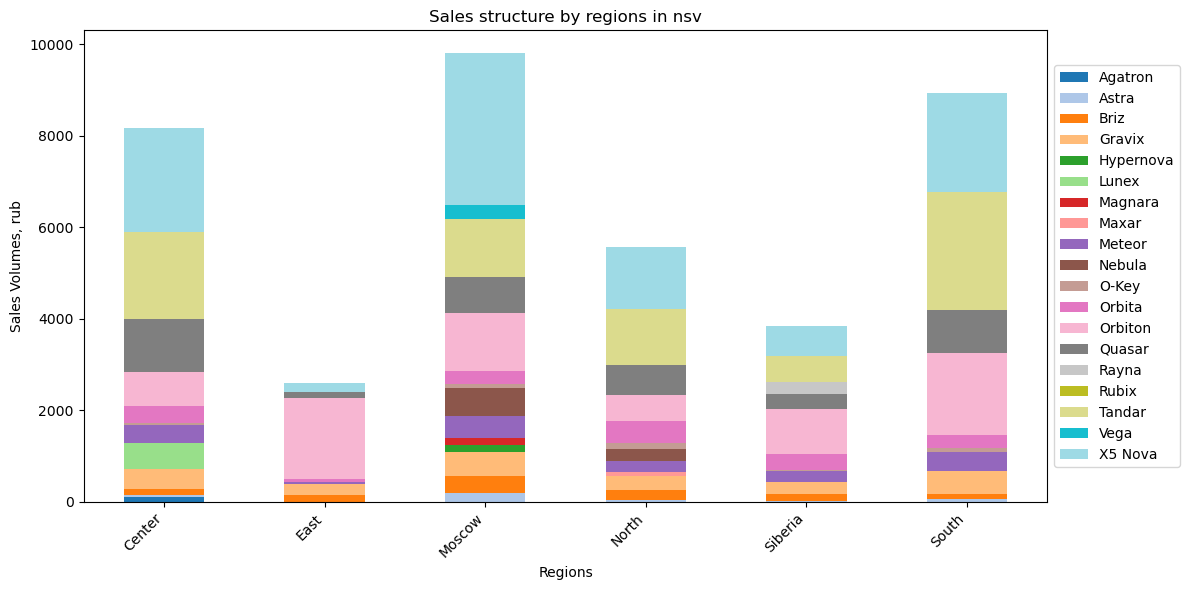

In [725]:
ax = pivot_data_nsv.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'  
)

plt.title('Sales structure by regions in nsv')
plt.xlabel('Regions')
plt.ylabel('Sales Volumes, rub')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [726]:
pivot_data_tonns = tonns.pivot_table(
    index='region',
    columns='chain',
    values='tonns_fact',
    aggfunc='sum',
    fill_value=0
)

pivot_data_tonns

chain,Agatron,Astra,Briz,Gravix,Hypernova,Lunex,Magnara,Maxar,Meteor,Nebula,O-Key,Orbita,Orbiton,Quasar,Rayna,Rubix,Tandar,Vega,X5 Nova
region,,,,,,,,,,,,,,,,,,,
Center,185.769732,64.382977,207.016024,680.059548,0.000000,787.926938,0.000000,0.000000,592.385295,0.000000,68.278307,528.229809,1092.421418,1666.637759,0.000000,0.000000e+00,2710.106369,0.000000,3257.307379
East,0.000000,0.000000,226.439143,382.963275,0.000000,0.000000,0.000000,0.000000,76.739497,0.000000,13.225407,71.910170,2352.687990,181.546865,0.000000,0.000000e+00,3.464142,0.000000,290.917355
Moscow,0.000000,233.199673,548.764567,830.020873,202.296366,0.000000,188.852912,0.000000,719.807634,912.297390,121.108658,378.418182,1847.283010,1154.444980,0.000000,0.000000e+00,1804.244262,414.798054,4919.809578
North,0.000000,37.794051,351.583034,496.802599,0.000000,0.000000,0.000000,110.018454,355.516597,390.020993,188.029321,657.507147,838.944088,964.048712,0.000000,0.000000e+00,1761.936155,0.000000,1943.440236
Siberia,0.000000,24.286342,226.685005,442.187879,0.000000,0.000000,0.000000,0.000000,361.324299,0.000000,33.876752,488.746140,1482.747860,475.454344,372.575168,0.000000e+00,829.185286,0.000000,954.838560
South,0.000000,69.587059,174.316343,779.859866,0.000000,0.000000,0.000000,0.000000,637.940918,4.201305,95.028627,392.604656,2909.998788,1362.540057,0.000000,2.112000e-07,3720.220862,0.000000,3142.703270


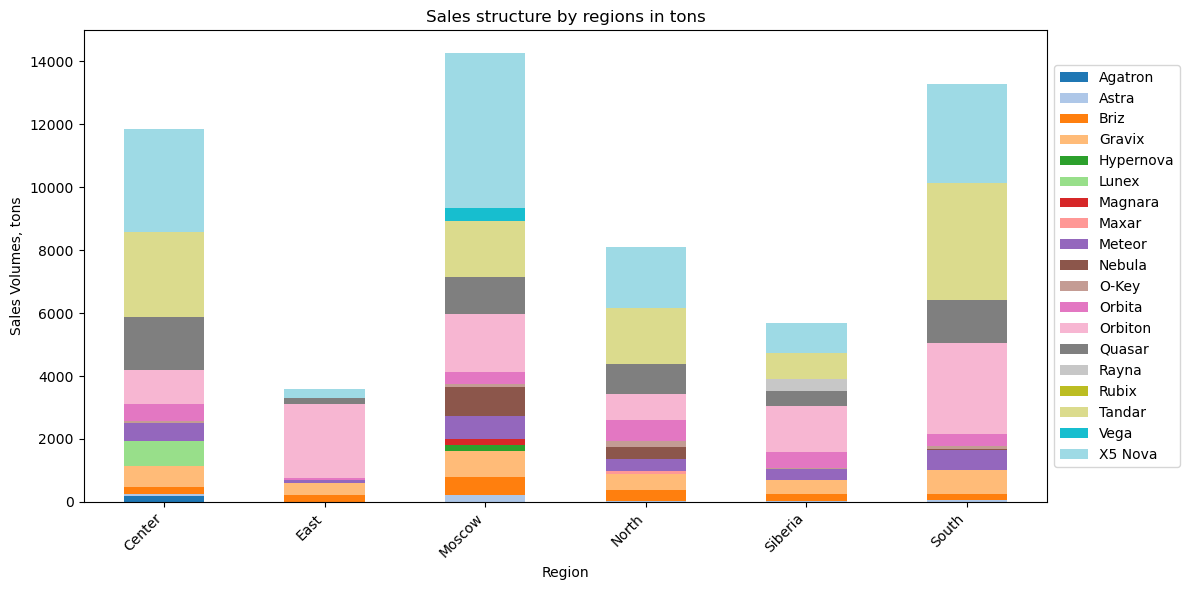

In [727]:
ax = pivot_data_tonns.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'  
)

plt.title('Sales structure by regions in tons')
plt.xlabel('Region')
plt.ylabel('Sales Volumes, tons')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ABC-analysis

#### Analysis of Sales in nsv (rubles)

In [728]:
abc_nsv = pd.DataFrame(nsv.groupby(['region', 'chain'])['nsv_fact'].sum()).reset_index()
abc_nsv.sort_values(by=['region', 'chain'])

,region,chain,nsv_fact
0,Center,Agatron,97.824188
1,Center,Astra,56.066143
2,Center,Briz,135.912773
3,Center,Gravix,432.938509
4,Center,Lunex,558.092540
...,...,...,...
65,South,Orbiton,1802.194007
66,South,Quasar,936.845255
67,South,Rubix,0.001133
68,South,Tandar,2577.630696


In [729]:
abc_nsv['nsv_sum_regions'] = abc_nsv.groupby('region')['nsv_fact'].transform('sum')
abc_nsv

,region,chain,nsv_fact,nsv_sum_regions
0,Center,Agatron,97.824188,8170.952851
1,Center,Astra,56.066143,8170.952851
2,Center,Briz,135.912773,8170.952851
3,Center,Gravix,432.938509,8170.952851
4,Center,Lunex,558.092540,8170.952851
...,...,...,...,...
65,South,Orbiton,1802.194007,8935.846507
66,South,Quasar,936.845255,8935.846507
67,South,Rubix,0.001133,8935.846507
68,South,Tandar,2577.630696,8935.846507


In [730]:
abc_nsv['nsv_region_share'] = abc_nsv['nsv_fact'] / abc_nsv['nsv_sum_regions'] * 100
abc_nsv.sort_values(by=['region', 'nsv_region_share'], ascending=[True, False]).head()

,region,chain,nsv_fact,nsv_sum_regions,nsv_region_share
11,Center,X5 Nova,2272.680160,8170.952851,27.814139
10,Center,Tandar,1908.876386,8170.952851,23.361735
9,Center,Quasar,1145.934513,8170.952851,14.024491
8,Center,Orbiton,741.267171,8170.952851,9.071980
4,Center,Lunex,558.092540,8170.952851,6.830201


In [731]:
abc_nsv = abc_nsv.sort_values(by=['region', 'nsv_region_share'], ascending=[True, False]).reset_index()
abc_nsv.drop(columns=['index'])

,region,chain,nsv_fact,nsv_sum_regions,nsv_region_share
0,Center,X5 Nova,2272.680160,8170.952851,27.814139
1,Center,Tandar,1908.876386,8170.952851,23.361735
2,Center,Quasar,1145.934513,8170.952851,14.024491
3,Center,Orbiton,741.267171,8170.952851,9.071980
4,Center,Lunex,558.092540,8170.952851,6.830201
...,...,...,...,...,...
65,South,Briz,114.444366,8935.846507,1.280733
66,South,O-Key,72.929054,8935.846507,0.816140
67,South,Astra,60.708023,8935.846507,0.679376
68,South,Nebula,3.002952,8935.846507,0.033606


In [732]:
abc_nsv['nsv_region_cumsum'] = abc_nsv.groupby('region')['nsv_region_share'].cumsum()
abc_nsv.drop(columns=['index'])

,region,chain,nsv_fact,nsv_sum_regions,nsv_region_share,nsv_region_cumsum
0,Center,X5 Nova,2272.680160,8170.952851,27.814139,27.814139
1,Center,Tandar,1908.876386,8170.952851,23.361735,51.175874
2,Center,Quasar,1145.934513,8170.952851,14.024491,65.200365
3,Center,Orbiton,741.267171,8170.952851,9.071980,74.272344
4,Center,Lunex,558.092540,8170.952851,6.830201,81.102546
...,...,...,...,...,...,...
65,South,Briz,114.444366,8935.846507,1.280733,98.470865
66,South,O-Key,72.929054,8935.846507,0.816140,99.287005
67,South,Astra,60.708023,8935.846507,0.679376,99.966382
68,South,Nebula,3.002952,8935.846507,0.033606,99.999987


<Axes: >

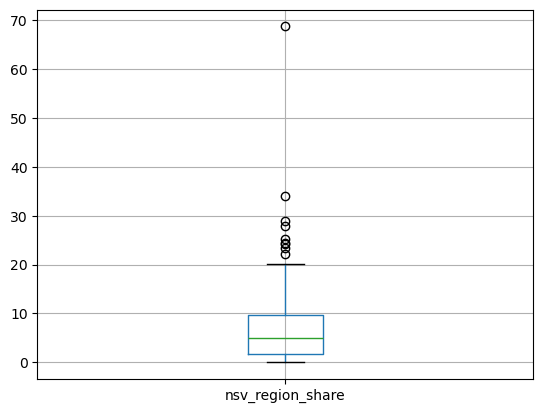

In [733]:
pd.DataFrame(abc_nsv['nsv_region_share']).boxplot()

In [734]:
print(f'Quantile 3 sales share:{abc_nsv["nsv_region_share"].quantile(0.75)}')
print(f'Median sales share:{abc_nsv["nsv_region_share"].median()}')
print(f'Mean sales share:{abc_nsv["nsv_region_share"].mean()}')

Quantile 3 sales share:9.747646826561045
Median sales share:5.053817299746756
Mean sales share:8.571428571428568


In [735]:
def abc_groups(df, column, new_col_name):
    q75 = df[column].quantile(0.75)
    median = df[column].median()

    def label(row):
        if row[column] >= q75:
            return 'A'
        elif row[column] >= median:
            return 'B'
        else:
            return 'C'

    df[new_col_name] = df.apply(label, axis=1)
    return df

In [736]:
abc_nsv = abc_groups(abc_nsv, 'nsv_region_share', 'abc_group_nsv')
abc_nsv

,index,region,chain,nsv_fact,nsv_sum_regions,nsv_region_share,nsv_region_cumsum,abc_group_nsv
0,11,Center,X5 Nova,2272.680160,8170.952851,27.814139,27.814139,A
1,10,Center,Tandar,1908.876386,8170.952851,23.361735,51.175874,A
2,9,Center,Quasar,1145.934513,8170.952851,14.024491,65.200365,A
3,8,Center,Orbiton,741.267171,8170.952851,9.071980,74.272344,B
4,4,Center,Lunex,558.092540,8170.952851,6.830201,81.102546,B
...,...,...,...,...,...,...,...,...
65,59,South,Briz,114.444366,8935.846507,1.280733,98.470865,C
66,63,South,O-Key,72.929054,8935.846507,0.816140,99.287005,C
67,58,South,Astra,60.708023,8935.846507,0.679376,99.966382,C
68,62,South,Nebula,3.002952,8935.846507,0.033606,99.999987,C


In [737]:
groups_total_nsv = abc_nsv.pivot_table(
    index='region',
    columns='abc_group_nsv',
    values = 'chain',
    aggfunc='count'
).sort_values(by=['A', 'B', 'C'], ascending=[False, False, False]).reset_index()

In [738]:
groups_total_nsv['total'] = groups_total_nsv['A'] + groups_total_nsv['B'] + groups_total_nsv['C']
groups_total_nsv

abc_group_nsv,region,A,B,C,total
0,North,4,2,6,12
1,South,4,1,7,12
2,Siberia,3,5,3,11
3,Moscow,3,3,8,14
4,Center,3,3,6,12
5,East,1,3,5,9


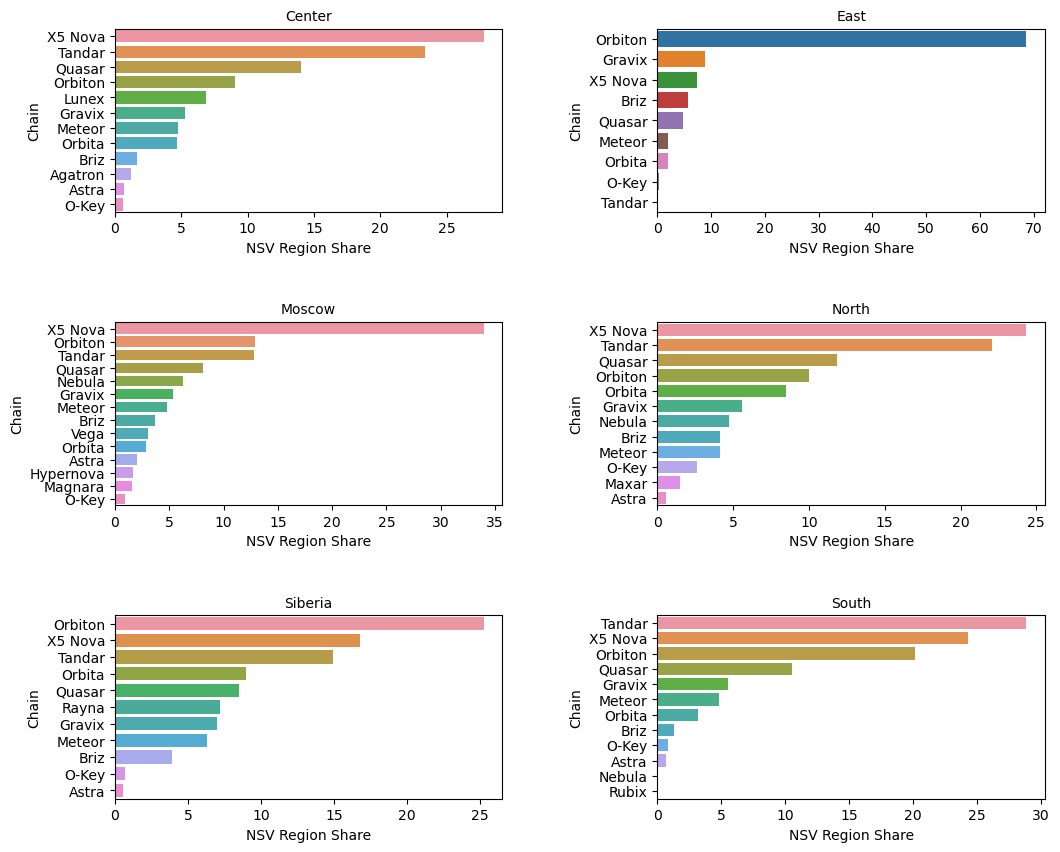

In [739]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))  # Adjust height to avoid overlap
axes = axes.flatten()

regions = abc_nsv['region'].unique()

for i in range(len(regions)):
    data = abc_nsv[abc_nsv['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='nsv_region_share',
        orient='h',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('NSV Region Share')
    axes[i].set_ylabel('Chain')

plt.subplots_adjust(hspace=0.6, wspace=0.4)

plt.show()

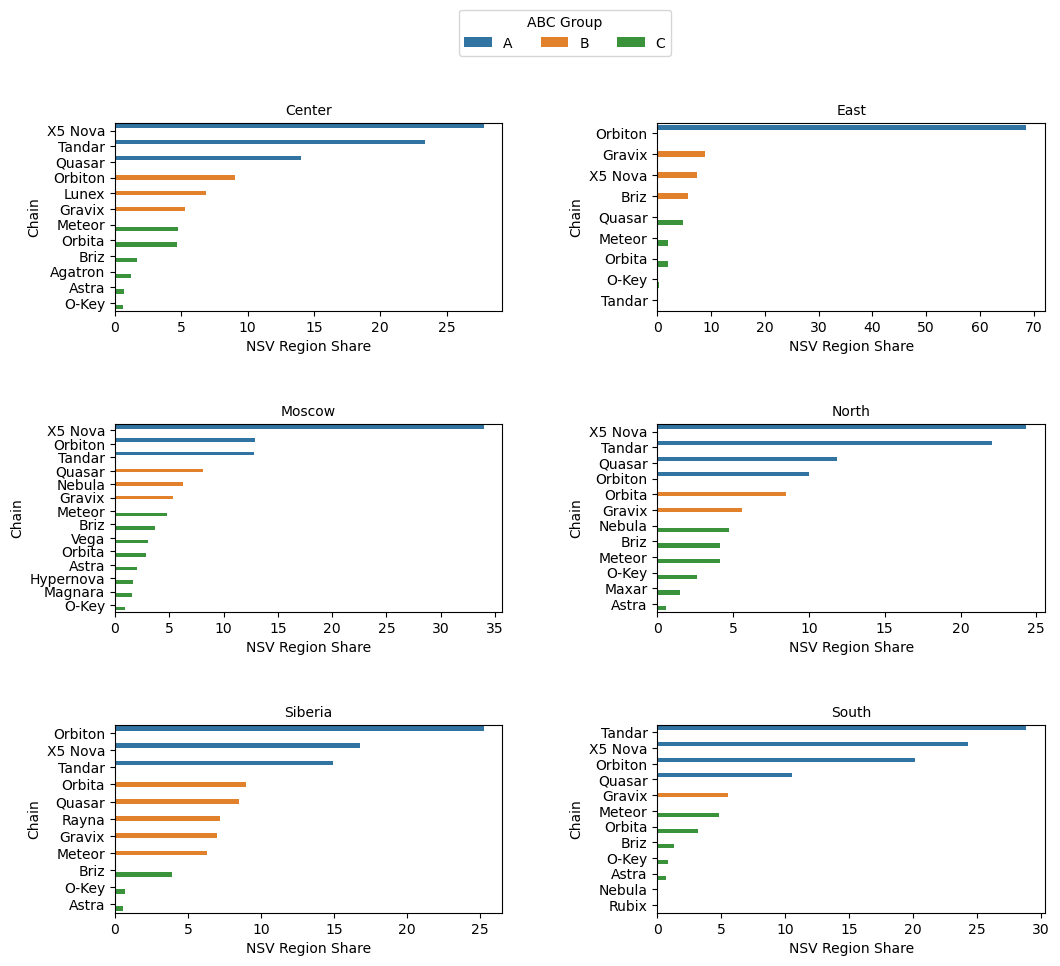

In [740]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))  # Adjust height to avoid overlap
axes = axes.flatten()

regions = abc_nsv['region'].unique()

for i in range(len(regions)):
    data = abc_nsv[abc_nsv['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='nsv_region_share',
        orient='h',
        hue = 'abc_group_nsv',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('NSV Region Share')
    axes[i].set_ylabel('Chain')
    axes[i].get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='ABC Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.subplots_adjust(hspace=0.6, wspace=0.4, top=0.9)  # Leave space at the top
plt.show()

#### Analysis of Sales in tons

In [741]:
tonns.head()

,chain,region,period_year,tonns_LY,tonns_fact,vs LY %,vs LY
0,Agatron,Center,P1 2025,74.30,0.000000,0.000000,0.000000
1,Agatron,Center,P2 2025,196.07,111.701528,56.970229,0.290561
2,Agatron,Center,P3 2025,148.73,74.122924,49.837238,0.335085
3,Agatron,Center,P4 2025,26.67,-0.054720,-0.205174,-0.007693
4,Agatron,Center,P5 2025,14.15,0.000000,0.000000,0.000000


In [742]:
abc_tonns = pd.DataFrame(tonns.groupby(['region', 'chain'])['tonns_fact'].sum()).reset_index()
abc_tonns.sort_values(by=['region', 'chain']).head()

,region,chain,tonns_fact
0,Center,Agatron,185.769732
1,Center,Astra,64.382977
2,Center,Briz,207.016024
3,Center,Gravix,680.059548
4,Center,Lunex,787.926938


In [743]:
abc_tonns['tonns_sum_regions'] = abc_tonns.groupby('region')['tonns_fact'].transform('sum')
abc_tonns

,region,chain,tonns_fact,tonns_sum_regions
0,Center,Agatron,1.857697e+02,11840.521554
1,Center,Astra,6.438298e+01,11840.521554
2,Center,Briz,2.070160e+02,11840.521554
3,Center,Gravix,6.800595e+02,11840.521554
4,Center,Lunex,7.879269e+02,11840.521554
...,...,...,...,...
65,South,Orbiton,2.909999e+03,13289.001752
66,South,Quasar,1.362540e+03,13289.001752
67,South,Rubix,2.112000e-07,13289.001752
68,South,Tandar,3.720221e+03,13289.001752


In [744]:
abc_tonns['tonns_region_share'] = abc_tonns['tonns_fact'] / abc_tonns['tonns_sum_regions'] * 100
abc_tonns = abc_tonns.sort_values(by=['region', 'tonns_region_share'], ascending=[True, False])

In [745]:
abc_tonns['tonns_region_cumsum'] = abc_tonns.groupby('region')['tonns_region_share'].cumsum()
abc_tonns

,region,chain,tonns_fact,tonns_sum_regions,tonns_region_share,tonns_region_cumsum
11,Center,X5 Nova,3.257307e+03,11840.521554,2.750983e+01,27.509830
10,Center,Tandar,2.710106e+03,11840.521554,2.288840e+01,50.398234
9,Center,Quasar,1.666638e+03,11840.521554,1.407571e+01,64.473946
8,Center,Orbiton,1.092421e+03,11840.521554,9.226126e+00,73.700072
4,Center,Lunex,7.879269e+02,11840.521554,6.654495e+00,80.354567
...,...,...,...,...,...,...
59,South,Briz,1.743163e+02,13289.001752,1.311734e+00,98.729649
63,South,O-Key,9.502863e+01,13289.001752,7.150923e-01,99.444741
58,South,Astra,6.958706e+01,13289.001752,5.236440e-01,99.968385
62,South,Nebula,4.201305e+00,13289.001752,3.161490e-02,100.000000


<Axes: >

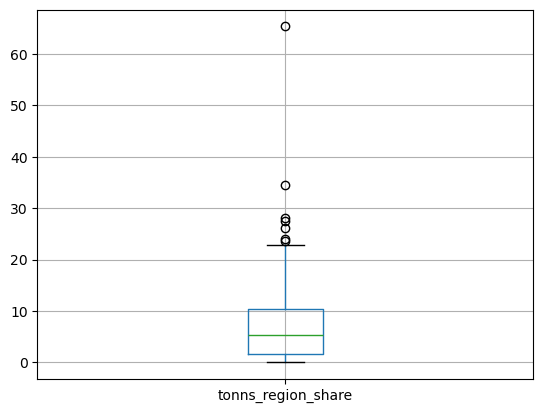

In [746]:
pd.DataFrame(abc_tonns['tonns_region_share']).boxplot()

In [747]:
print(f'Quantile 3 sales share: {abc_tonns["tonns_region_share"].quantile(0.75)}')
print(f'Median sales share:{abc_tonns["tonns_region_share"].median()}')
print(f'Mean sales share:{abc_tonns["tonns_region_share"].mean()}')

Quantile 3 sales share: 10.335468222003426
Median sales share:5.393305174219515
Mean sales share:8.571428571428571


In [748]:
abc_tonns = abc_groups(abc_tonns, 'tonns_region_share', 'abc_group_tonns')
abc_tonns

,region,chain,tonns_fact,tonns_sum_regions,tonns_region_share,tonns_region_cumsum,abc_group_tonns
11,Center,X5 Nova,3.257307e+03,11840.521554,2.750983e+01,27.509830,A
10,Center,Tandar,2.710106e+03,11840.521554,2.288840e+01,50.398234,A
9,Center,Quasar,1.666638e+03,11840.521554,1.407571e+01,64.473946,A
8,Center,Orbiton,1.092421e+03,11840.521554,9.226126e+00,73.700072,B
4,Center,Lunex,7.879269e+02,11840.521554,6.654495e+00,80.354567,B
...,...,...,...,...,...,...,...
59,South,Briz,1.743163e+02,13289.001752,1.311734e+00,98.729649,C
63,South,O-Key,9.502863e+01,13289.001752,7.150923e-01,99.444741,C
58,South,Astra,6.958706e+01,13289.001752,5.236440e-01,99.968385,C
62,South,Nebula,4.201305e+00,13289.001752,3.161490e-02,100.000000,C


In [749]:
groups_total_tonns = abc_tonns.pivot_table(
    index='region',
    columns='abc_group_tonns',
    values = 'chain',
    aggfunc='count'
).sort_values(by=['A', 'B', 'C'], ascending=[False, False, False]).reset_index()

In [750]:
groups_total_tonns['total'] = groups_total_tonns['A'] + groups_total_tonns['B'] + groups_total_tonns['C']
groups_total_tonns

abc_group_tonns,region,A,B,C,total
0,North,4,2,6,12
1,Siberia,3,5,3,11
2,Moscow,3,3,8,14
3,Center,3,3,6,12
4,South,3,2,7,12
5,East,2,2,5,9


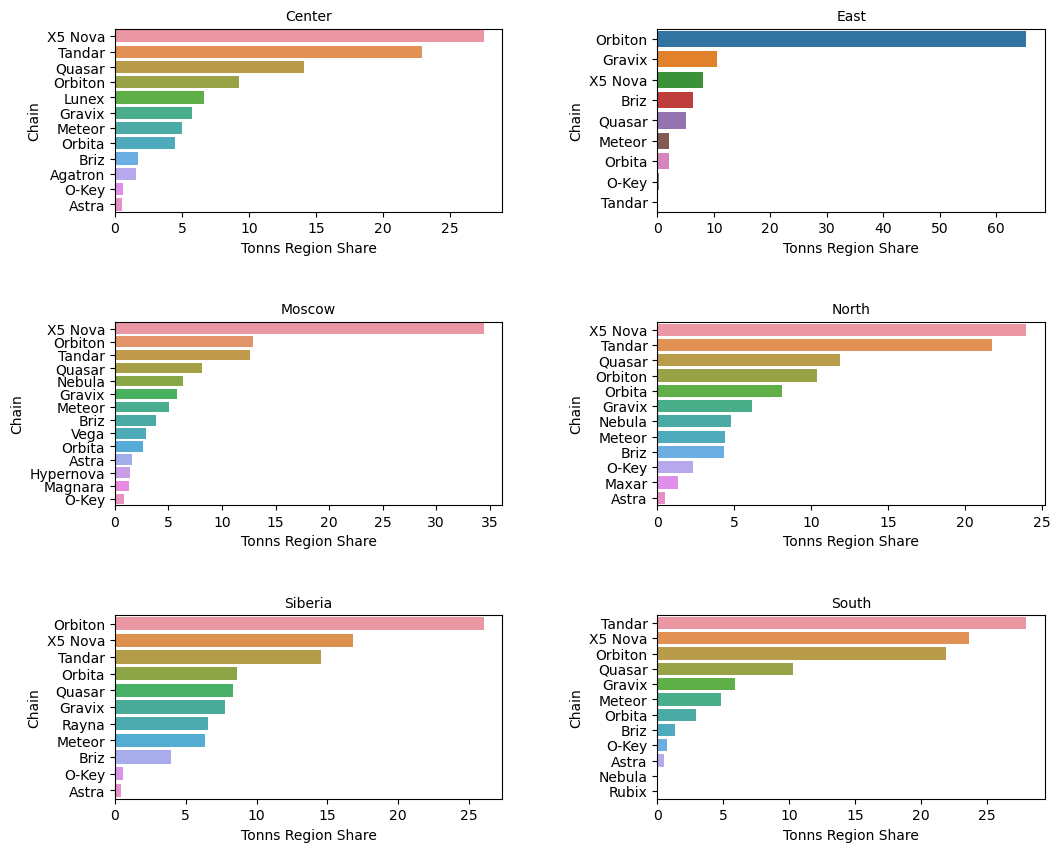

In [751]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

regions = abc_tonns['region'].unique()

for i in range(len(regions)):
    data = abc_tonns[abc_tonns['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='tonns_region_share',
        orient='h',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('Tonns Region Share')
    axes[i].set_ylabel('Chain')

plt.subplots_adjust(hspace=0.6, wspace=0.4)

plt.show()

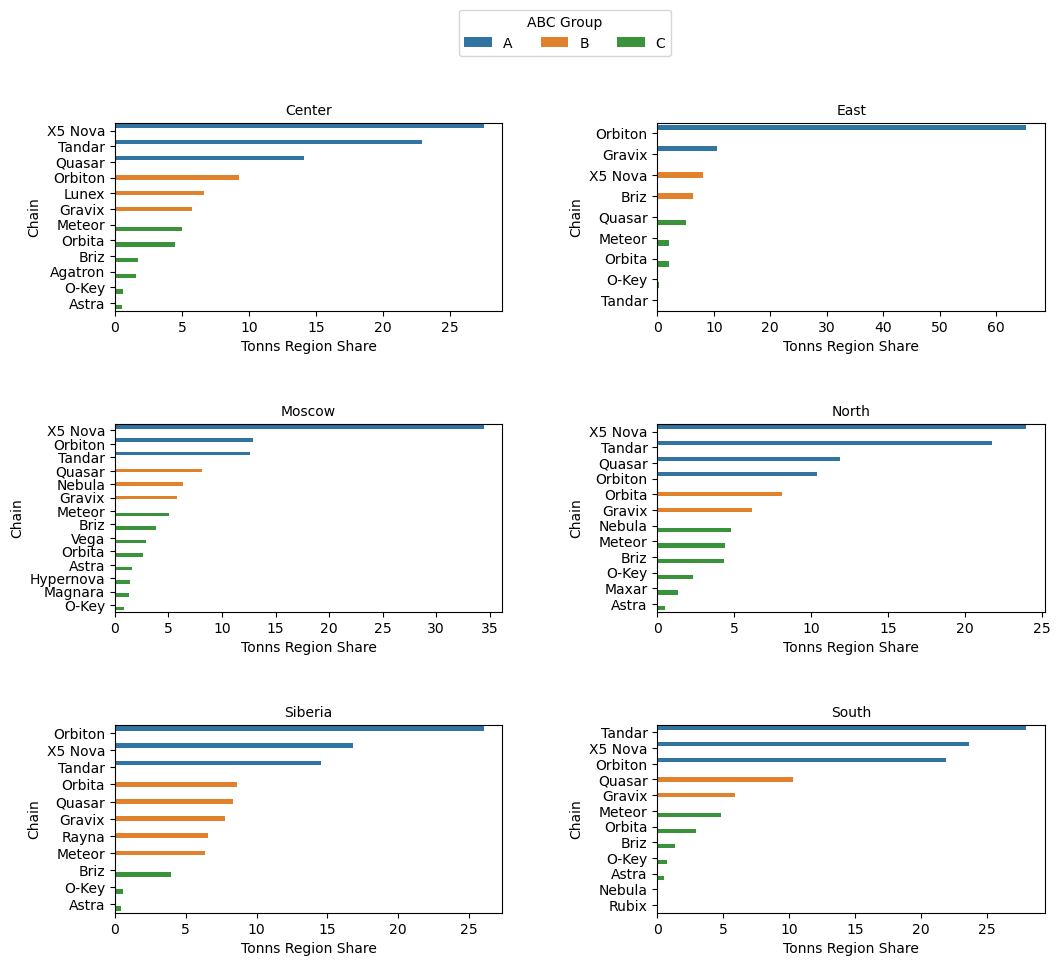

In [752]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))  # Adjust height to avoid overlap
axes = axes.flatten()

regions = abc_tonns['region'].unique()

for i in range(len(regions)):
    data = abc_tonns[abc_tonns['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='tonns_region_share',
        orient='h',
        hue = 'abc_group_tonns',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('Tonns Region Share')
    axes[i].set_ylabel('Chain')
    axes[i].get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='ABC Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.subplots_adjust(hspace=0.6, wspace=0.4, top=0.9)  # Leave space at the top
plt.show()

#### ABC-analysis NSV VS Tons comparison

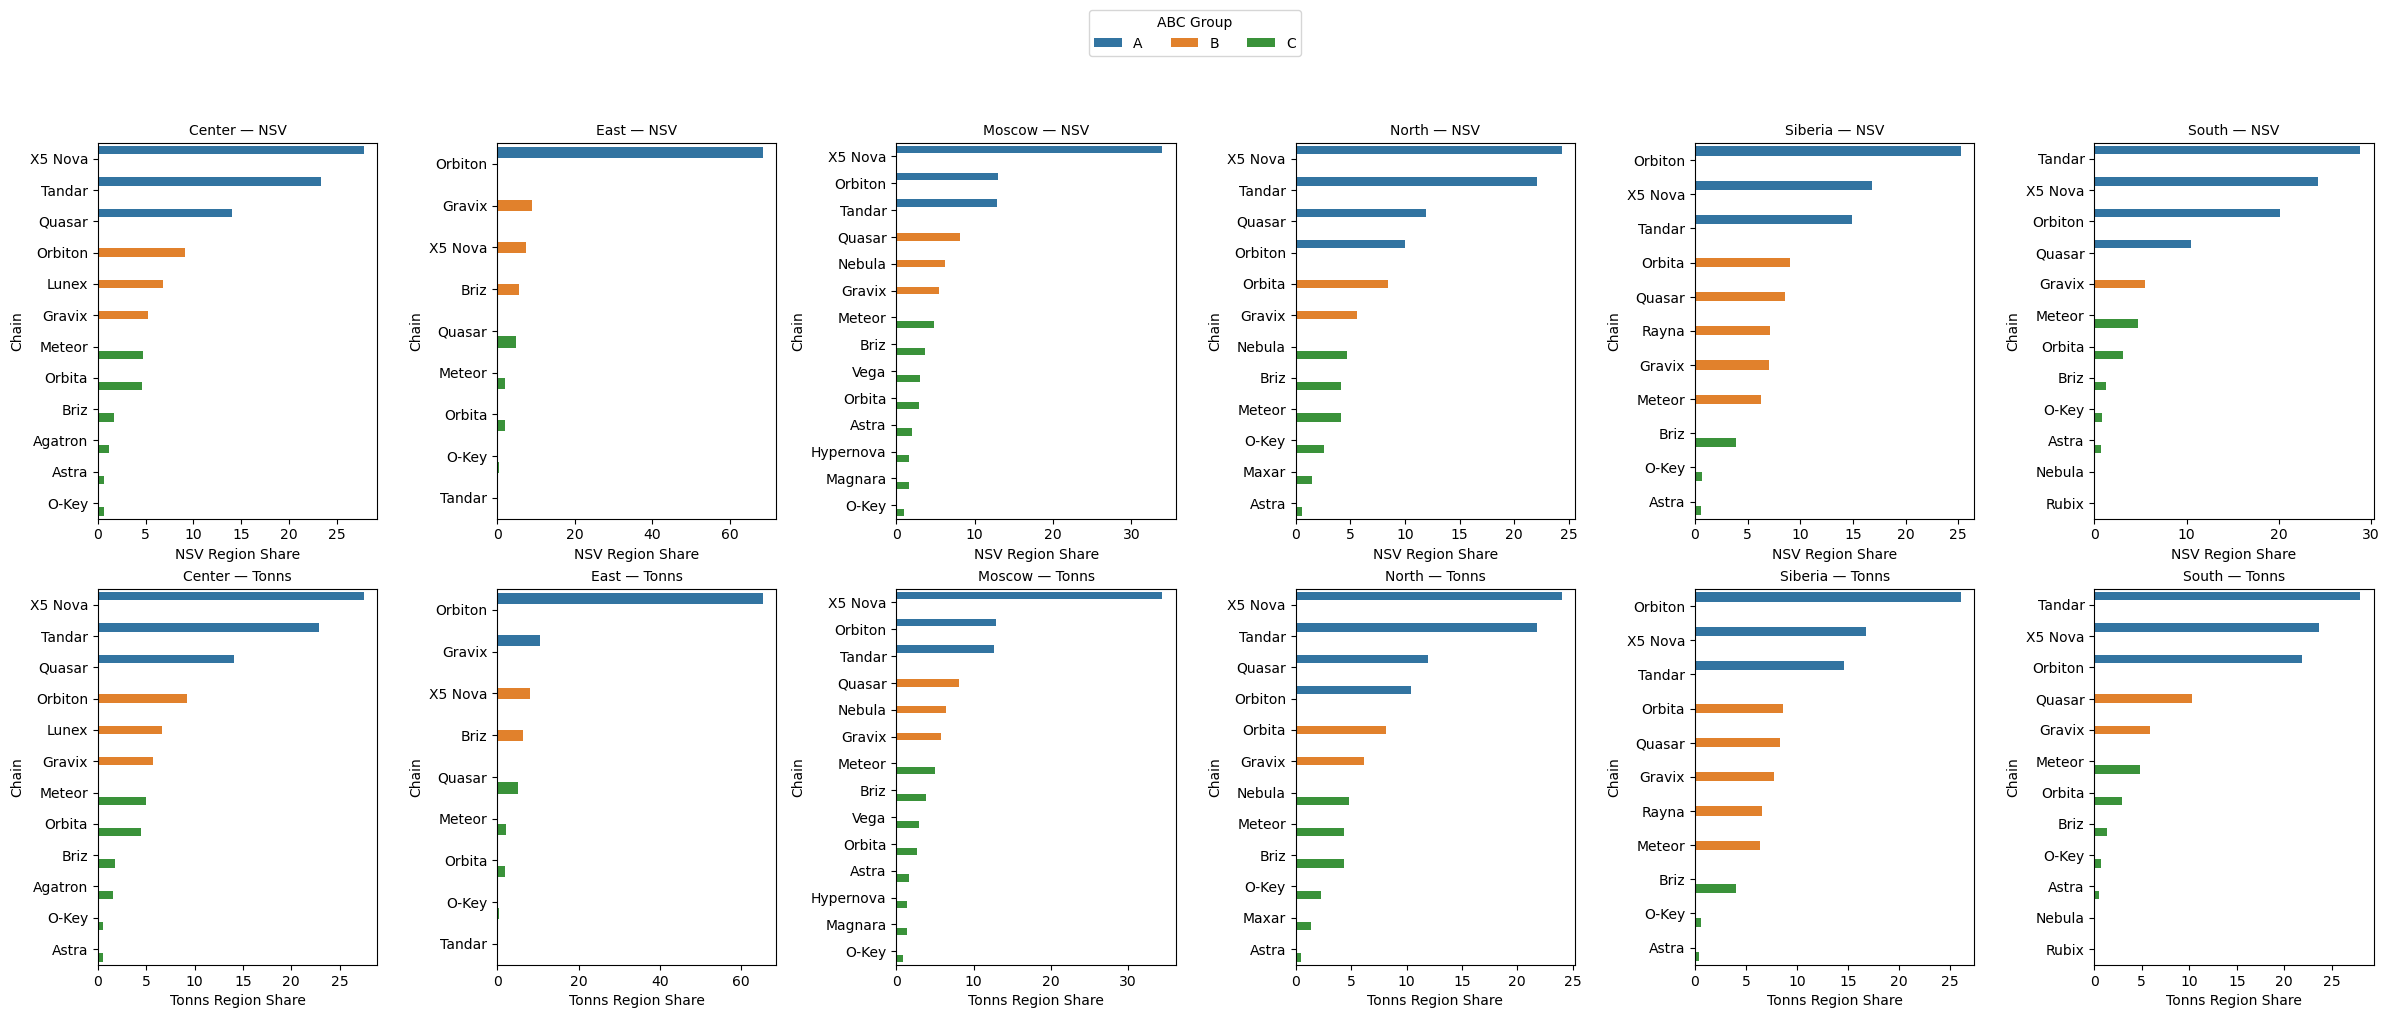

In [753]:
regions = abc_nsv['region'].unique()

fig, axes = plt.subplots(nrows=2, ncols=len(regions), figsize=(4 * len(regions), 10))
axes = axes.reshape(2, len(regions))  # строки: [0] — NSV, [1] — Tonns

# --- NSV по регионам ---
for i, region in enumerate(regions):
    data = abc_nsv[abc_nsv['region'] == region]
    
    sns.barplot(
        data=data,
        y='chain',
        x='nsv_region_share',
        hue='abc_group_nsv',
        orient='h',
        ax=axes[0][i]
    )
    
    axes[0][i].set_title(f"{region} — NSV", fontsize=10)
    axes[0][i].set_xlabel('NSV Region Share')
    axes[0][i].set_ylabel('Chain')
    axes[0][i].legend().remove()

# --- Tonns по регионам ---
for i, region in enumerate(regions):
    data = abc_tonns[abc_tonns['region'] == region]
    
    sns.barplot(
        data=data,
        y='chain',
        x='tonns_region_share',
        hue='abc_group_tonns',
        orient='h',
        ax=axes[1][i]
    )
    
    axes[1][i].set_title(f"{region} — Tonns", fontsize=10)
    axes[1][i].set_xlabel('Tonns Region Share')
    axes[1][i].set_ylabel('Chain')
    axes[1][i].legend().remove()

# --- Легенда ---
handles, labels = axes[1][0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='ABC Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Оставить место под легенду
plt.show()

### XYZ - analysis

#### Analysis of Sales in nsv (rubles)

In [754]:
xyz_nsv = (
    nsv
    .groupby(['region', 'chain'])['nsv_fact']
    .agg(mean='mean', std='std')
    .reset_index()
)

In [755]:
xyz_nsv

,region,chain,mean,std
0,Center,Agatron,16.304031,25.728272
1,Center,Astra,9.344357,4.326391
2,Center,Briz,22.652129,17.460744
3,Center,Gravix,72.156418,17.254013
4,Center,Lunex,93.015423,33.571015
...,...,...,...,...
65,South,Orbiton,300.365668,244.208863
66,South,Quasar,156.140876,51.062978
67,South,Rubix,0.000189,0.000463
68,South,Tandar,429.605116,70.224449


In [756]:
xyz_nsv['CV'] = xyz_nsv['std'] / xyz_nsv['mean']
xyz_nsv

,region,chain,mean,std,CV
0,Center,Agatron,16.304031,25.728272,1.578031
1,Center,Astra,9.344357,4.326391,0.462995
2,Center,Briz,22.652129,17.460744,0.770821
3,Center,Gravix,72.156418,17.254013,0.239120
4,Center,Lunex,93.015423,33.571015,0.360919
...,...,...,...,...,...
65,South,Orbiton,300.365668,244.208863,0.813039
66,South,Quasar,156.140876,51.062978,0.327031
67,South,Rubix,0.000189,0.000463,2.449542
68,South,Tandar,429.605116,70.224449,0.163463


In [757]:
def classify_xyz(cv):
    if cv <= 0.25:
        return 'X'
    elif cv <= 0.5:
        return 'Y'
    else:
        return 'Z'

xyz_nsv['xyz_group_nsv'] = xyz_nsv['CV'].apply(classify_xyz)

In [758]:
xyz_nsv = xyz_nsv.sort_values(by=['region', 'CV'], ascending = [True, True])

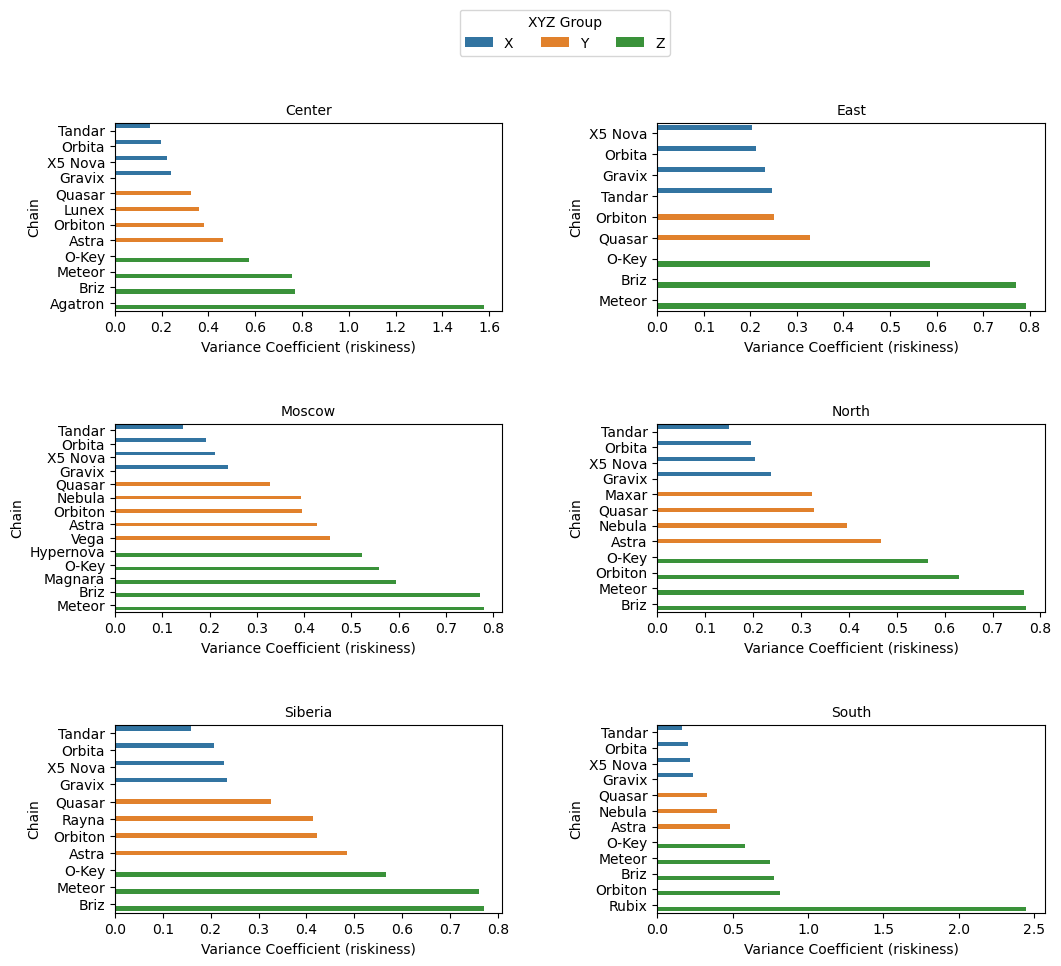

In [759]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 
axes = axes.flatten()

regions = xyz_nsv['region'].unique()

for i in range(len(regions)):
    data = xyz_nsv[xyz_nsv['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='CV',
        orient='h',
        hue = 'xyz_group_nsv',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('Variance Coefficient (riskiness)')
    axes[i].set_ylabel('Chain')
    axes[i].get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='XYZ Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.subplots_adjust(hspace=0.6, wspace=0.4, top=0.9)
plt.show()

#### Analysis of Sales in tons

In [760]:
xyz_tonns = (
    tonns
    .groupby(['region', 'chain'])['tonns_fact']
    .agg(mean='mean', std='std')
    .reset_index()
)

In [761]:
xyz_tonns

,region,chain,mean,std
0,Center,Agatron,3.096162e+01,4.943624e+01
1,Center,Astra,1.073050e+01,5.583096e+00
2,Center,Briz,3.450267e+01,2.915740e+01
3,Center,Gravix,1.133433e+02,2.926462e+01
4,Center,Lunex,1.313212e+02,4.743813e+01
...,...,...,...,...
65,South,Orbiton,4.849998e+02,4.318072e+02
66,South,Quasar,2.270900e+02,5.808706e+01
67,South,Rubix,3.520000e-08,8.622204e-08
68,South,Tandar,6.200368e+02,1.304875e+02


In [762]:
xyz_tonns['CV'] = xyz_tonns['std'] / xyz_tonns['mean']
xyz_tonns

,region,chain,mean,std,CV
0,Center,Agatron,3.096162e+01,4.943624e+01,1.596694
1,Center,Astra,1.073050e+01,5.583096e+00,0.520302
2,Center,Briz,3.450267e+01,2.915740e+01,0.845076
3,Center,Gravix,1.133433e+02,2.926462e+01,0.258195
4,Center,Lunex,1.313212e+02,4.743813e+01,0.361238
...,...,...,...,...,...
65,South,Orbiton,4.849998e+02,4.318072e+02,0.890324
66,South,Quasar,2.270900e+02,5.808706e+01,0.255789
67,South,Rubix,3.520000e-08,8.622204e-08,2.449490
68,South,Tandar,6.200368e+02,1.304875e+02,0.210451


In [763]:
xyz_tonns['xyz_group_tonns'] = xyz_tonns['CV'].apply(classify_xyz)

In [764]:
xyz_tonns = xyz_tonns.sort_values(by=['region', 'CV'], ascending = [True, True])

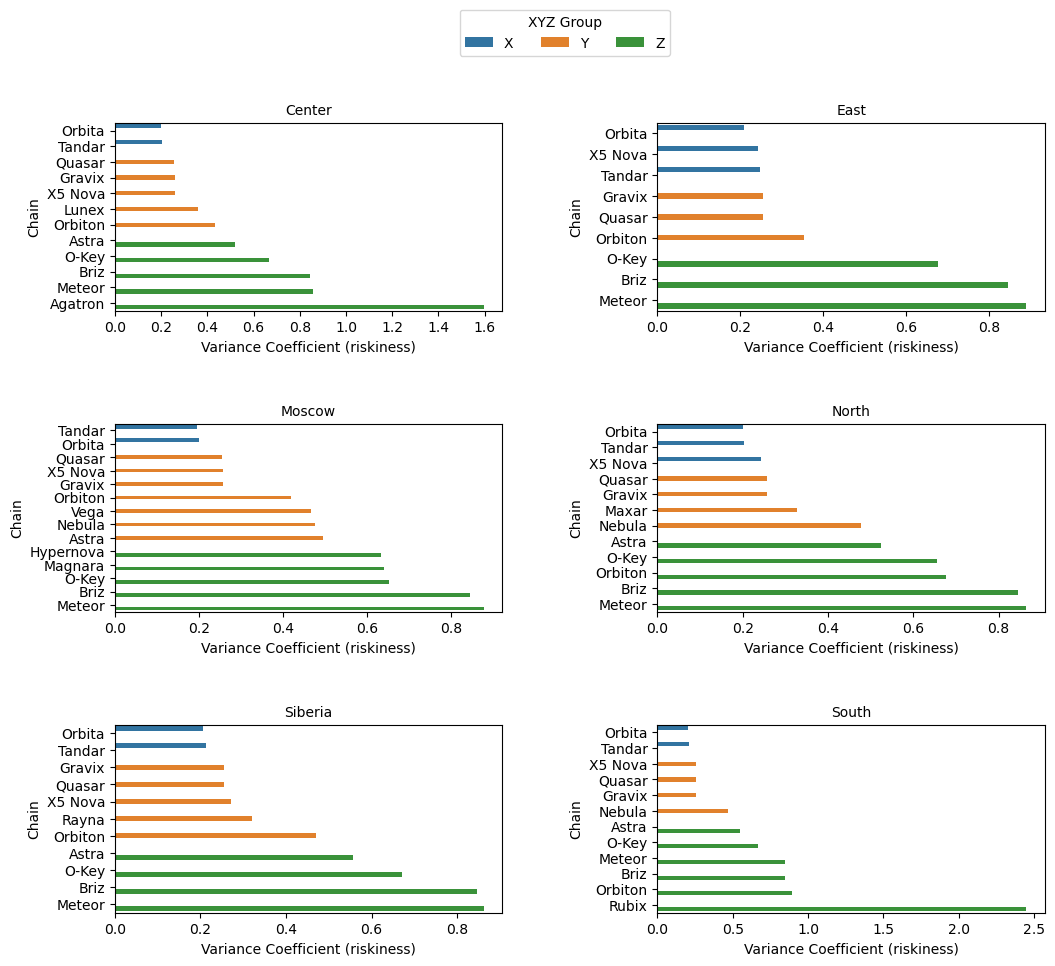

In [765]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 
axes = axes.flatten()

regions = xyz_tonns['region'].unique()

for i in range(len(regions)):
    data = xyz_tonns[xyz_tonns['region'] == regions[i]]
    
    sns.barplot(
        data=data,
        y='chain',
        x='CV',
        orient='h',
        hue = 'xyz_group_tonns',
        ax=axes[i]  
    )

    axes[i].set_title(regions[i], fontsize=10)
    axes[i].set_xlabel('Variance Coefficient (riskiness)')
    axes[i].set_ylabel('Chain')
    axes[i].get_legend().remove()


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='XYZ Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.subplots_adjust(hspace=0.6, wspace=0.4, top=0.9)
plt.show()

#### XYZ-analysis NSV VS Tons comparison

In [767]:
xyz_nsv

,region,chain,mean,std,CV,xyz_group_nsv
10,Center,Tandar,318.146064,48.309388,0.151847,X
7,Center,Orbita,63.290613,12.455972,0.196806,X
11,Center,X5 Nova,378.780027,83.910471,0.221528,X
3,Center,Gravix,72.156418,17.254013,0.239120,X
9,Center,Quasar,190.989085,62.459439,0.327031,Y
...,...,...,...,...,...,...
63,South,O-Key,12.154842,7.072744,0.581887,Z
61,South,Meteor,71.275972,53.452251,0.749934,Z
59,South,Briz,19.074061,14.702693,0.770821,Z
65,South,Orbiton,300.365668,244.208863,0.813039,Z


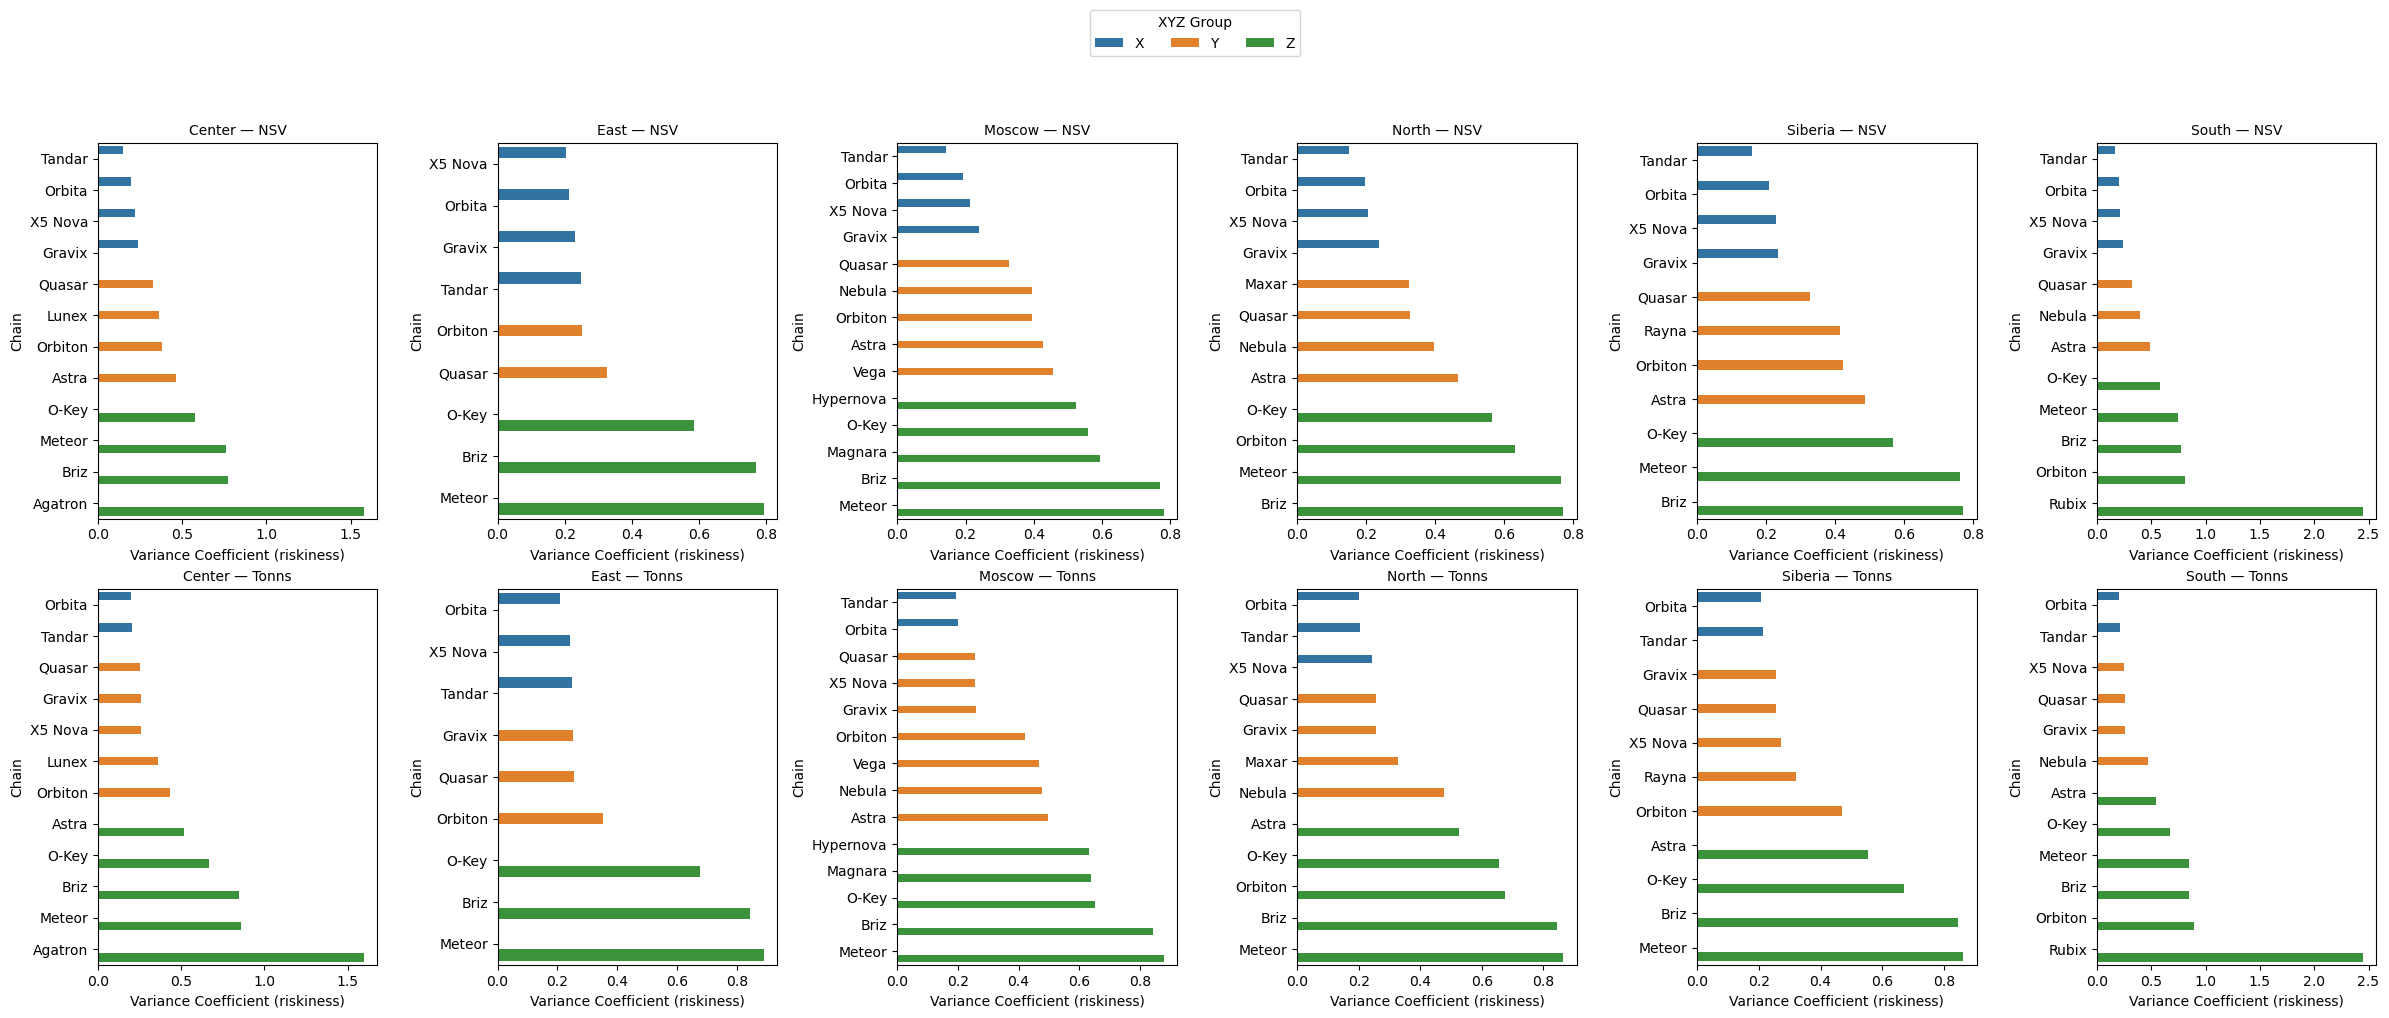

In [769]:
regions = abc_nsv['region'].unique()

fig, axes = plt.subplots(nrows=2, ncols=len(regions), figsize=(4 * len(regions), 10))
axes = axes.reshape(2, len(regions))  # строки: [0] — NSV, [1] — Tonns

# --- NSV по регионам ---
for i, region in enumerate(regions):
    data = xyz_nsv[xyz_nsv['region'] == region]
    
    sns.barplot(
        data=data,
        y='chain',
        x='CV',
        hue='xyz_group_nsv',
        orient='h',
        ax=axes[0][i]
    )
    
    axes[0][i].set_title(f"{region} — NSV", fontsize=10)
    axes[0][i].set_xlabel('Variance Coefficient (riskiness)')
    axes[0][i].set_ylabel('Chain')
    axes[0][i].legend().remove()

# --- Tonns по регионам ---
for i, region in enumerate(regions):
    data = xyz_tonns[xyz_tonns['region'] == region]
    
    sns.barplot(
        data=data,
        y='chain',
        x='CV',
        hue='xyz_group_tonns',
        orient='h',
        ax=axes[1][i]
    )
    
    axes[1][i].set_title(f"{region} — Tonns", fontsize=10)
    axes[1][i].set_xlabel('Variance Coefficient (riskiness)')
    axes[1][i].set_ylabel('Chain')
    axes[1][i].legend().remove()

# --- Легенда ---
handles, labels = axes[1][0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    title='XYZ Group',
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.02)
)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### ABC + XYZ analysis

In [770]:
abc_nsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              70 non-null     int64  
 1   region             70 non-null     object 
 2   chain              70 non-null     object 
 3   nsv_fact           70 non-null     float64
 4   nsv_sum_regions    70 non-null     float64
 5   nsv_region_share   70 non-null     float64
 6   nsv_region_cumsum  70 non-null     float64
 7   abc_group_nsv      70 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.5+ KB


In [771]:
xyz_nsv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 10 to 67
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         70 non-null     object 
 1   chain          70 non-null     object 
 2   mean           70 non-null     float64
 3   std            70 non-null     float64
 4   CV             70 non-null     float64
 5   xyz_group_nsv  70 non-null     object 
dtypes: float64(3), object(3)
memory usage: 3.8+ KB


In [772]:
total_nsv = pd.merge(abc_nsv, xyz_nsv, how = 'inner', on=['region', 'chain'])

In [773]:
total_tonns = pd.merge(abc_tonns, xyz_tonns, how='inner', on=['region', 'chain'])

In [774]:
total_nsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              70 non-null     int64  
 1   region             70 non-null     object 
 2   chain              70 non-null     object 
 3   nsv_fact           70 non-null     float64
 4   nsv_sum_regions    70 non-null     float64
 5   nsv_region_share   70 non-null     float64
 6   nsv_region_cumsum  70 non-null     float64
 7   abc_group_nsv      70 non-null     object 
 8   mean               70 non-null     float64
 9   std                70 non-null     float64
 10  CV                 70 non-null     float64
 11  xyz_group_nsv      70 non-null     object 
dtypes: float64(7), int64(1), object(4)
memory usage: 6.7+ KB


In [775]:
total_tonns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region               70 non-null     object 
 1   chain                70 non-null     object 
 2   tonns_fact           70 non-null     float64
 3   tonns_sum_regions    70 non-null     float64
 4   tonns_region_share   70 non-null     float64
 5   tonns_region_cumsum  70 non-null     float64
 6   abc_group_tonns      70 non-null     object 
 7   mean                 70 non-null     float64
 8   std                  70 non-null     float64
 9   CV                   70 non-null     float64
 10  xyz_group_tonns      70 non-null     object 
dtypes: float64(7), object(4)
memory usage: 6.1+ KB


In [776]:
total_nsv_tonns = pd.merge(total_nsv, total_tonns, how='inner', on=['region', 'chain'])

In [777]:
total_nsv_tonns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                70 non-null     int64  
 1   region               70 non-null     object 
 2   chain                70 non-null     object 
 3   nsv_fact             70 non-null     float64
 4   nsv_sum_regions      70 non-null     float64
 5   nsv_region_share     70 non-null     float64
 6   nsv_region_cumsum    70 non-null     float64
 7   abc_group_nsv        70 non-null     object 
 8   mean_x               70 non-null     float64
 9   std_x                70 non-null     float64
 10  CV_x                 70 non-null     float64
 11  xyz_group_nsv        70 non-null     object 
 12  tonns_fact           70 non-null     float64
 13  tonns_sum_regions    70 non-null     float64
 14  tonns_region_share   70 non-null     float64
 15  tonns_region_cumsum  70 non-null     float

In [778]:
total_nsv_tonns.to_excel('total_nsv_tonns.xlsx', index=False)

In [779]:
pivot_per_region = {}

for region, df_region in total_nsv_tonns.groupby('region'):
    pivot_nsv = df_region.pivot_table(
        index='abc_group_nsv',
        columns='xyz_group_nsv',
        values='chain',
        aggfunc=lambda x: ', '.join(x)
    )
    pivot_tonns = df_region.pivot_table(
        index='abc_group_tonns',
        columns='xyz_group_tonns',
        values='chain',
        aggfunc=lambda x: ', '.join(x)
    )
    pivot_per_region[region] = {
        'nsv': pivot_nsv,
        'tonns': pivot_tonns
    }


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


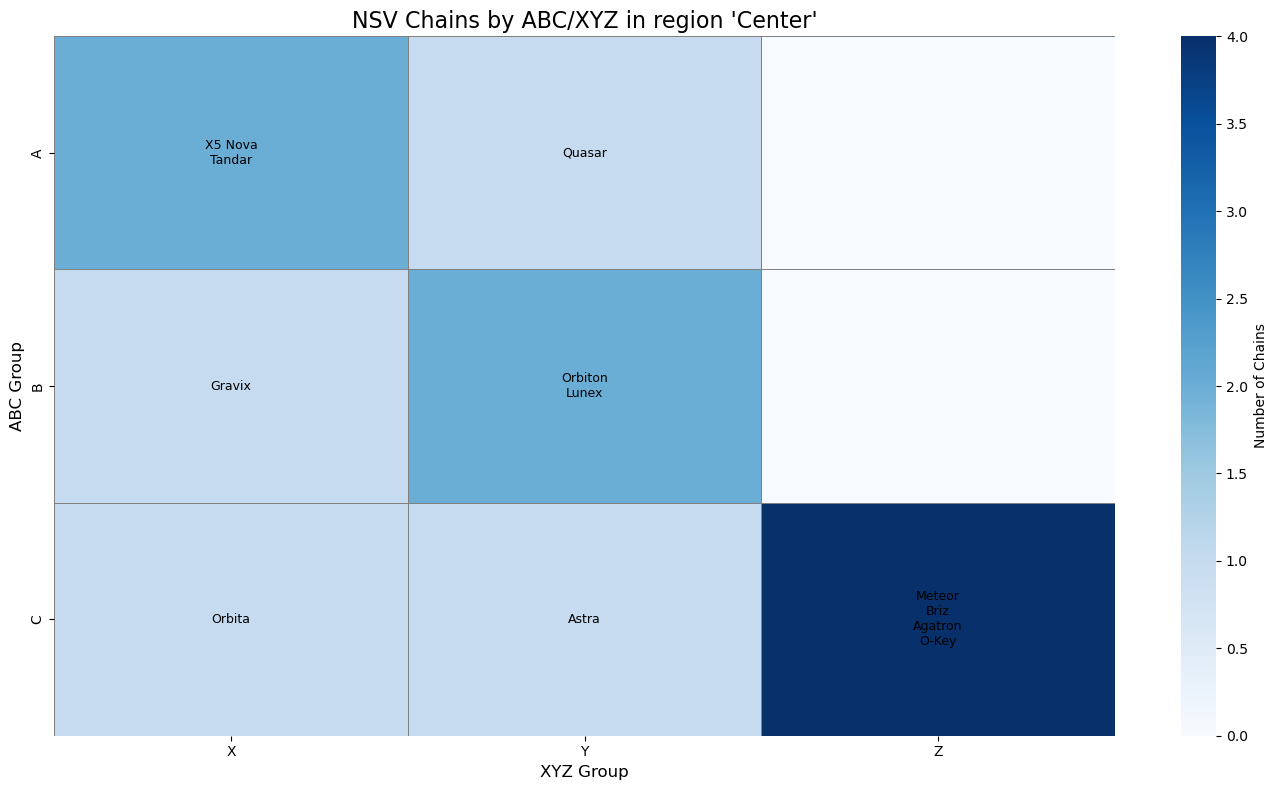

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


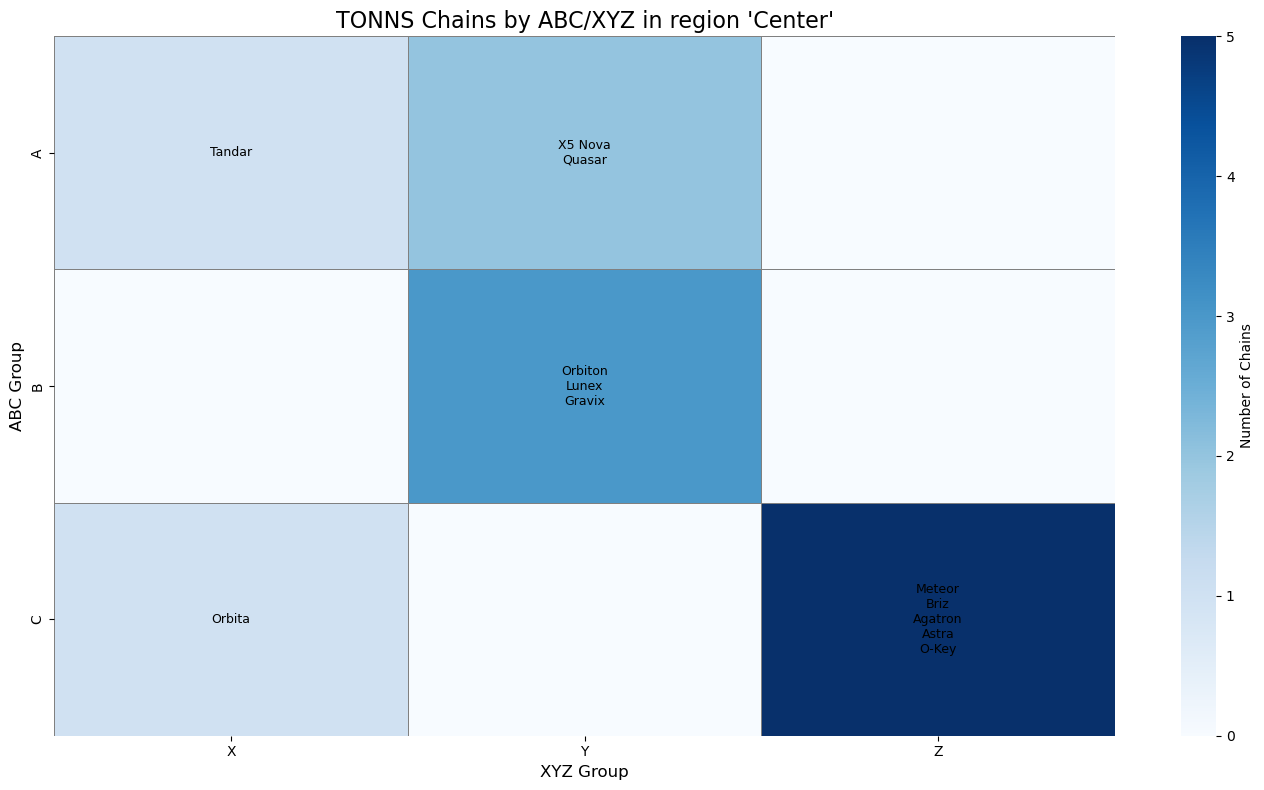

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


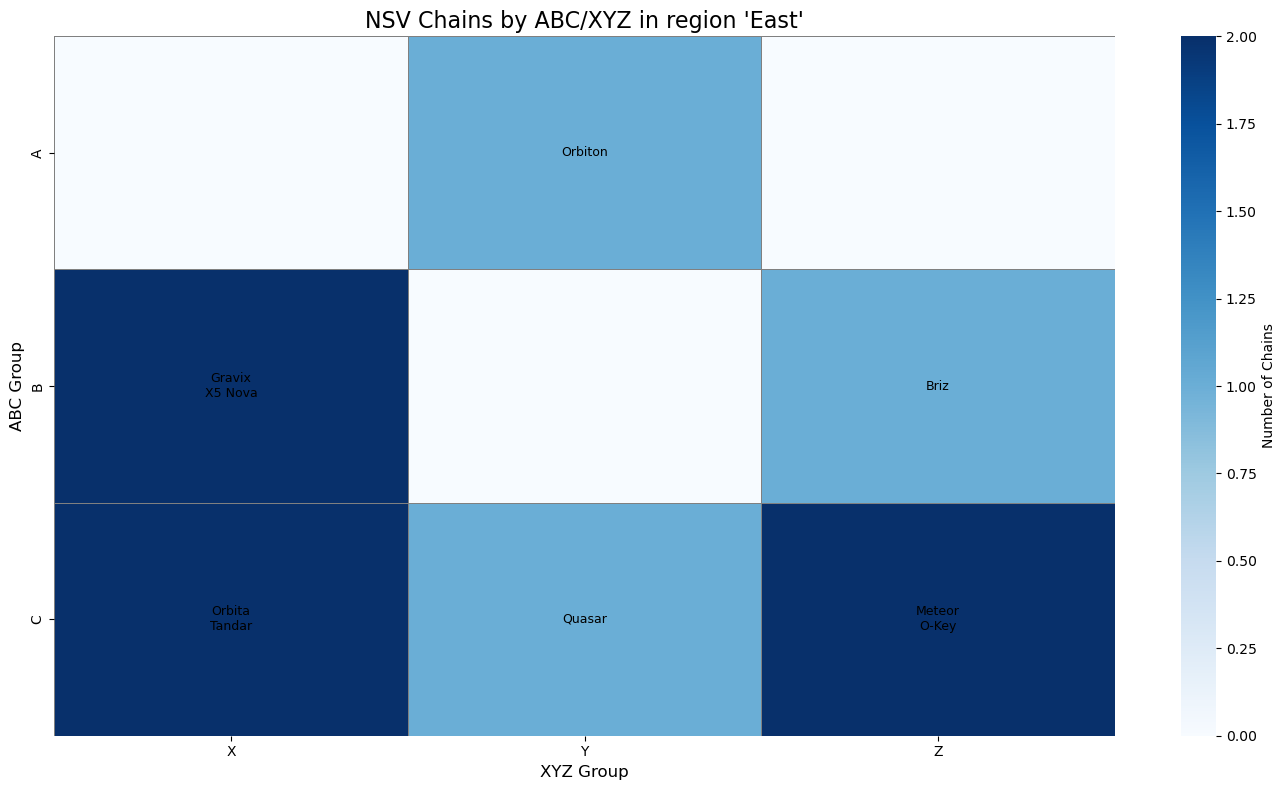

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


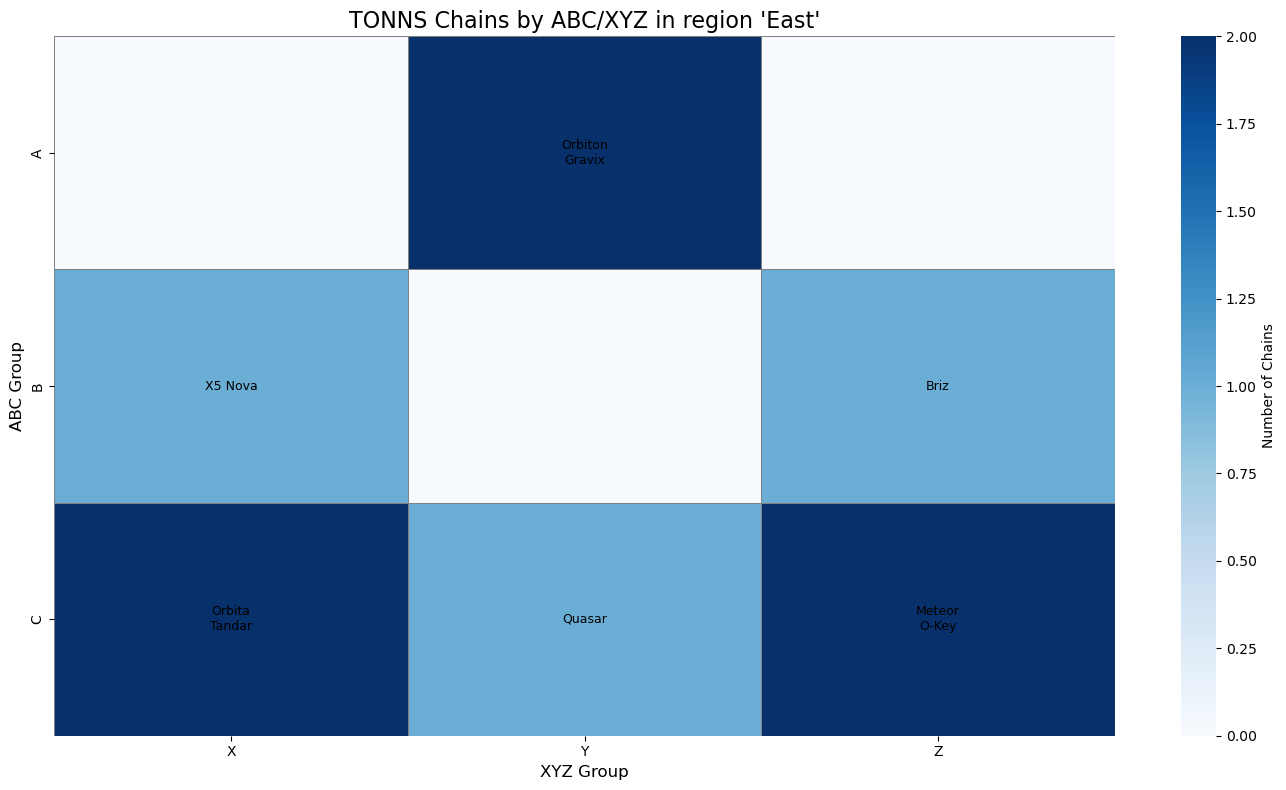

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


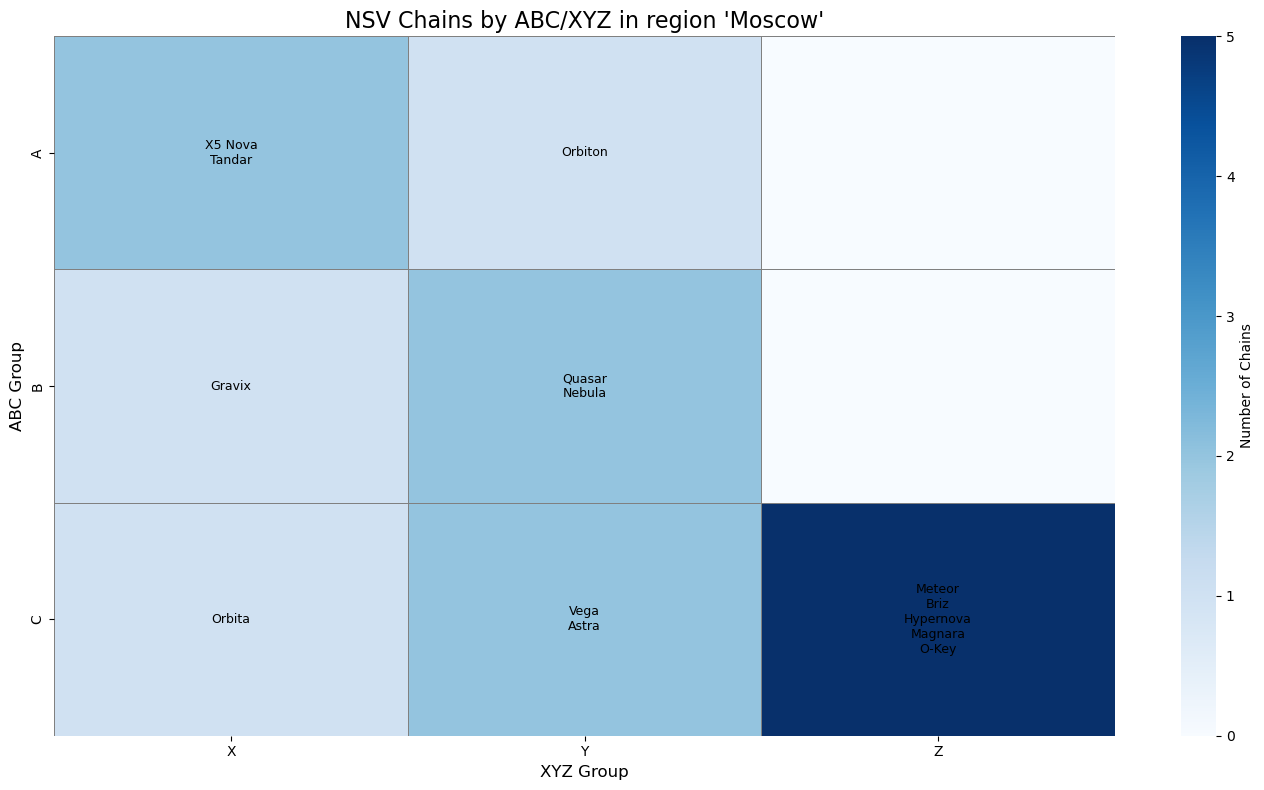

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


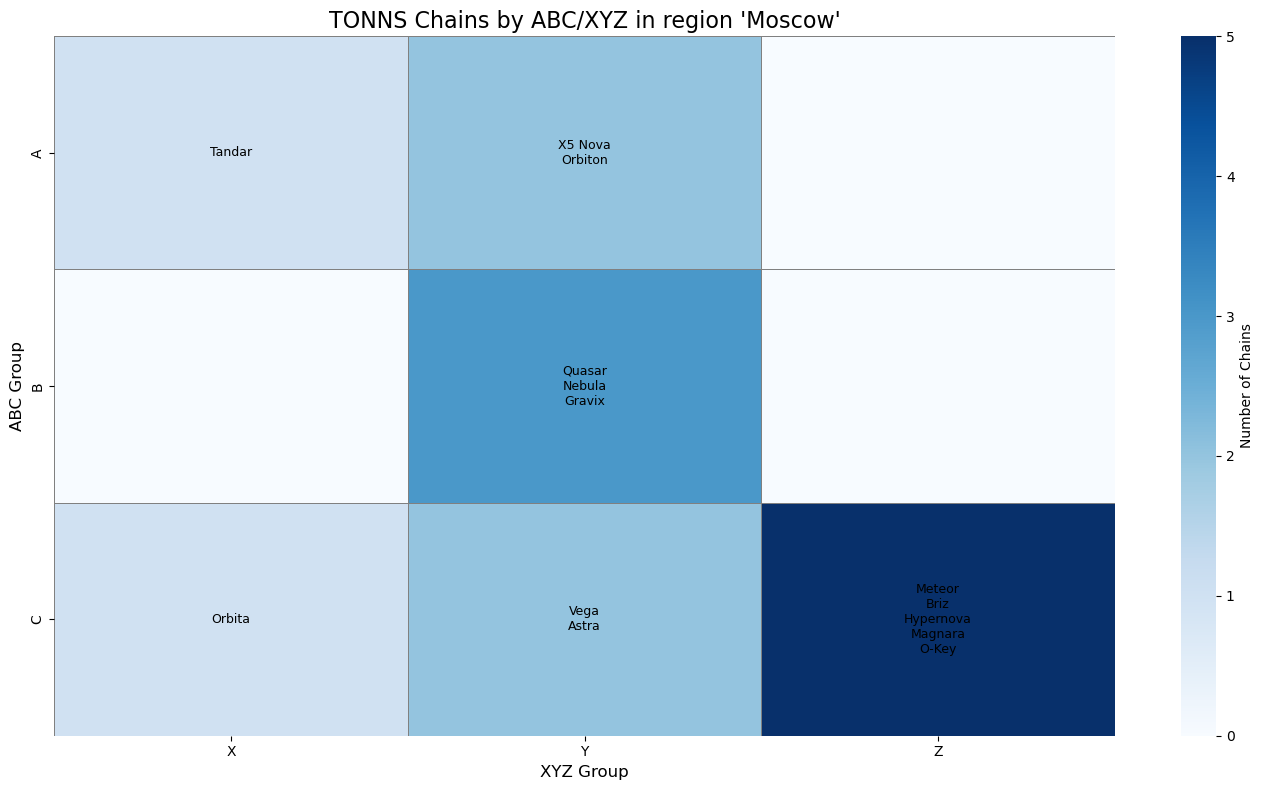

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


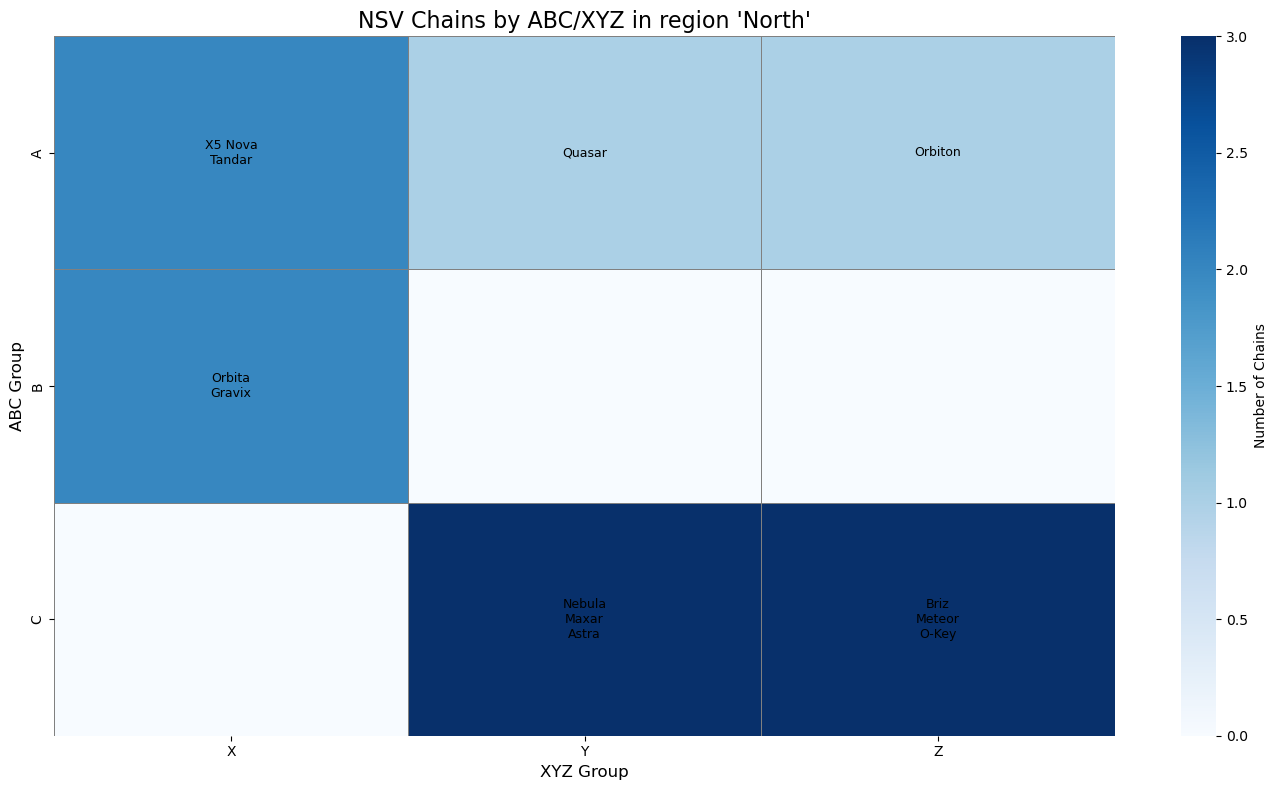

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


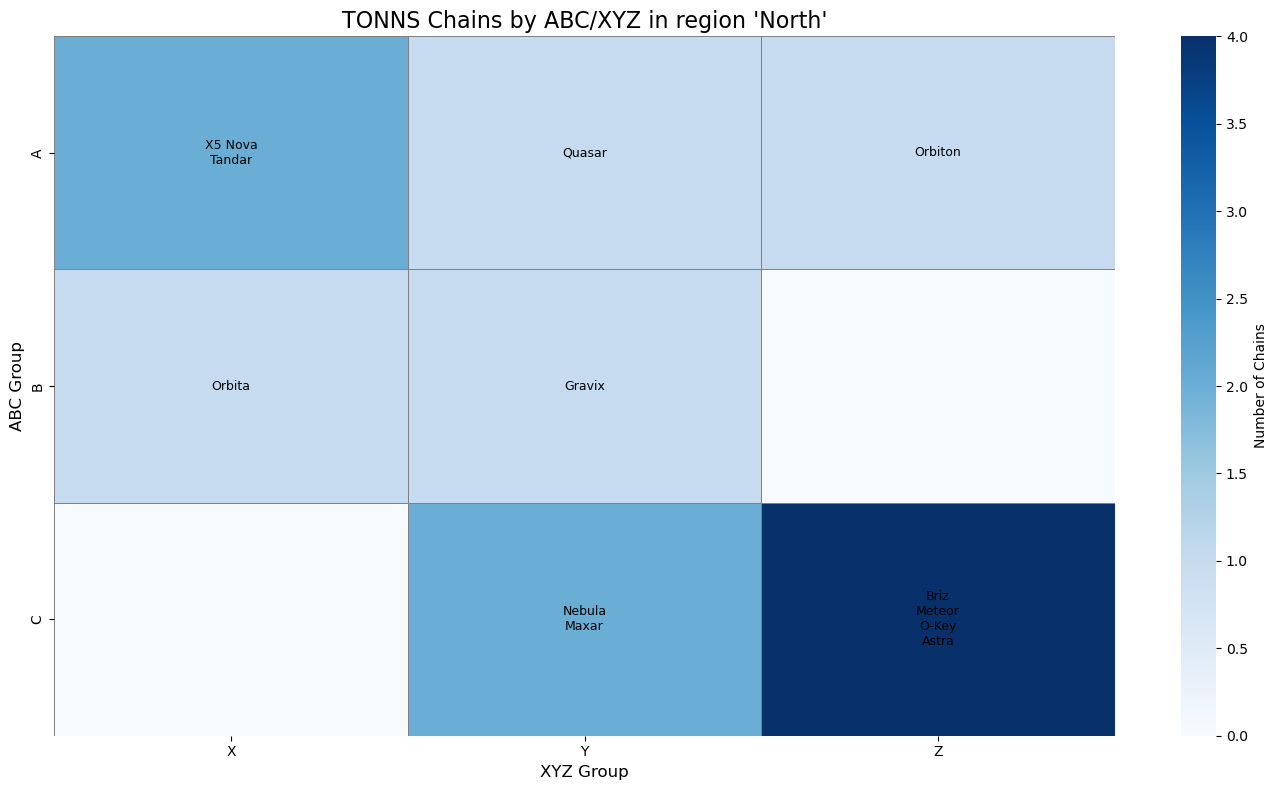

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


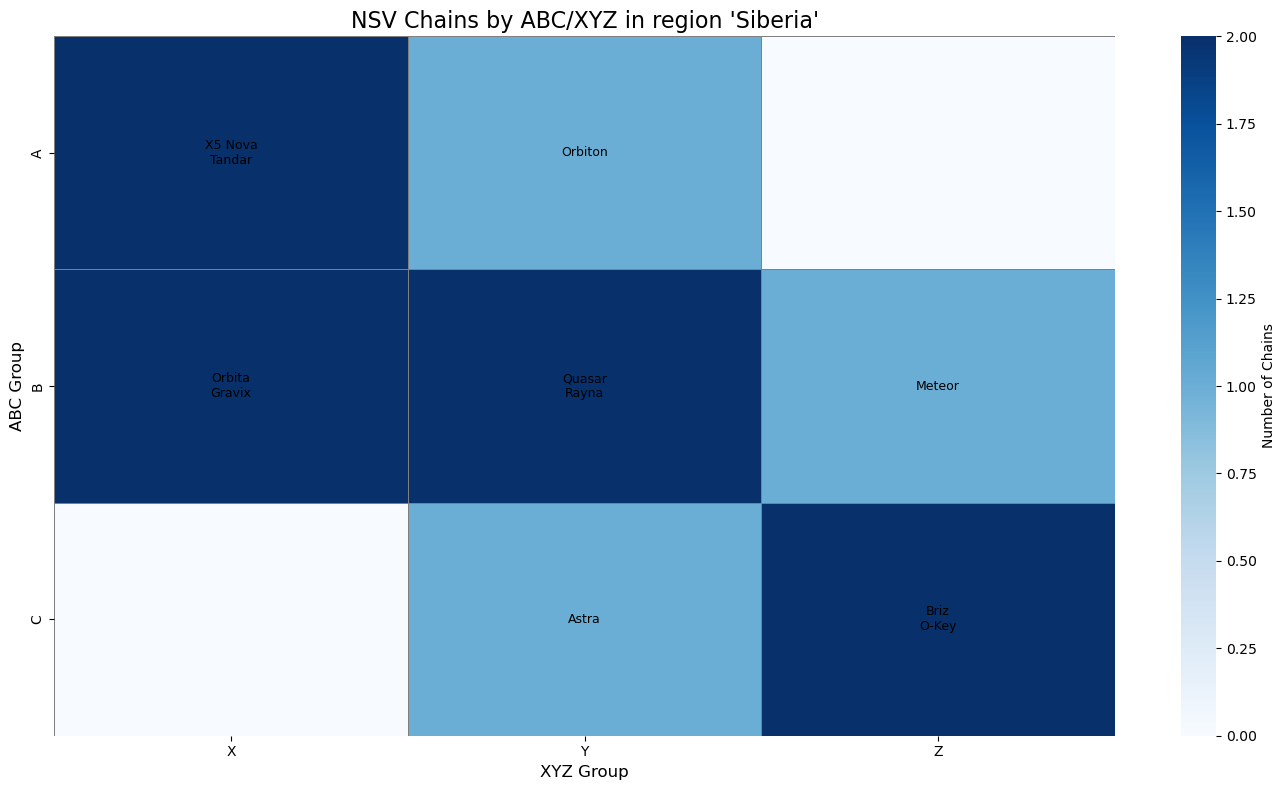

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


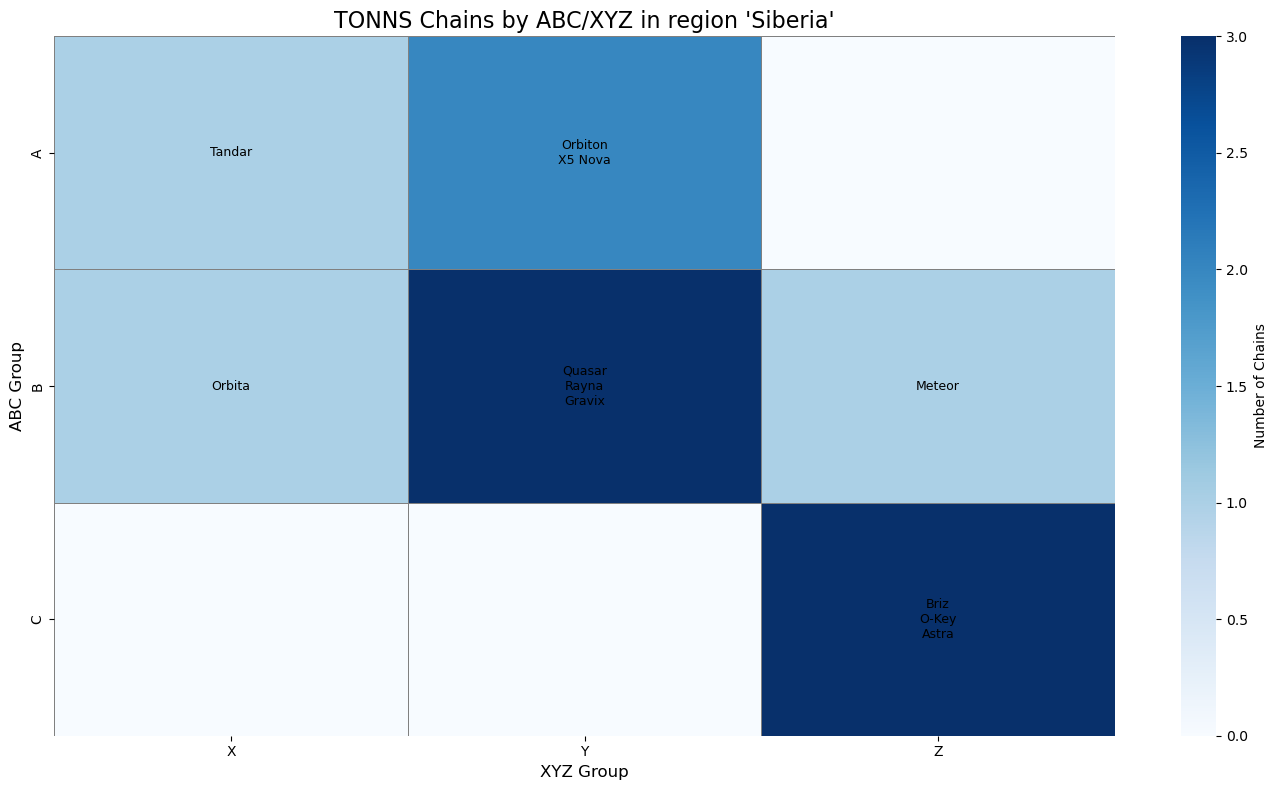

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


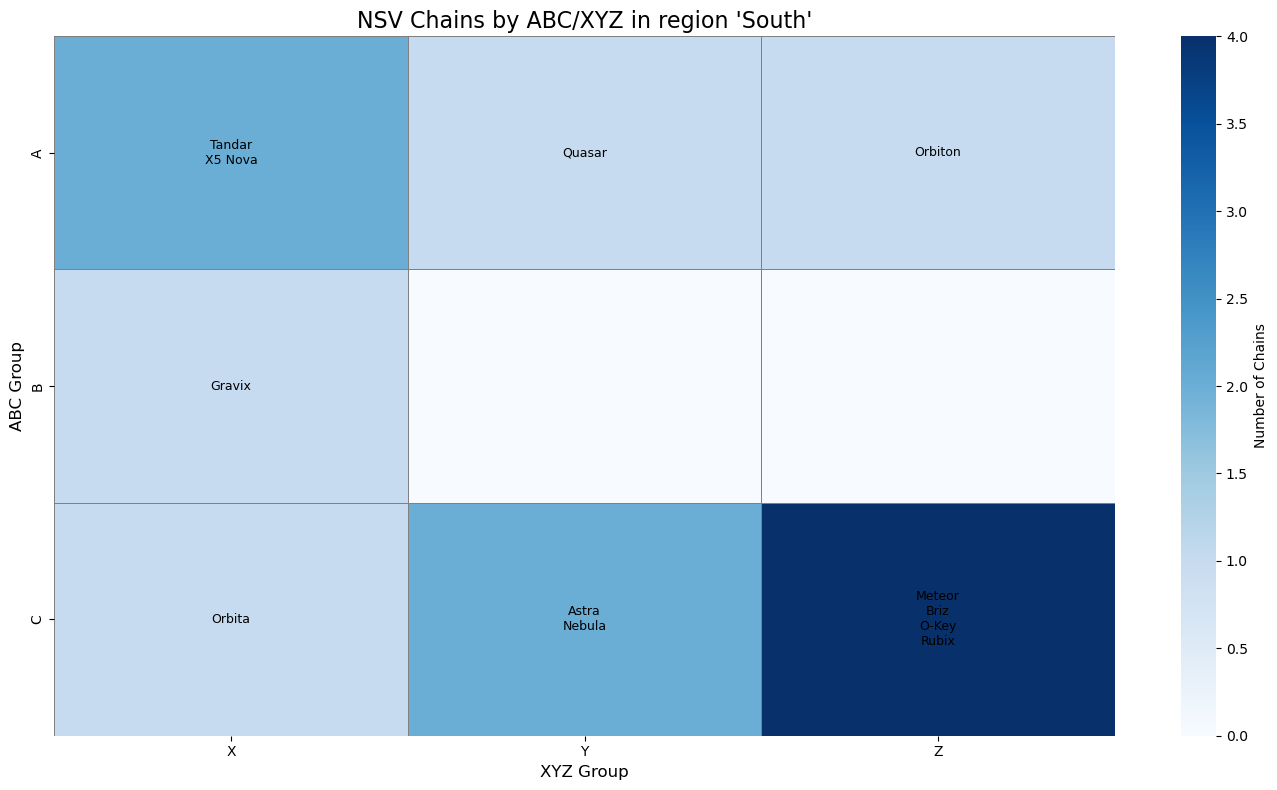

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21196\3034584948.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')


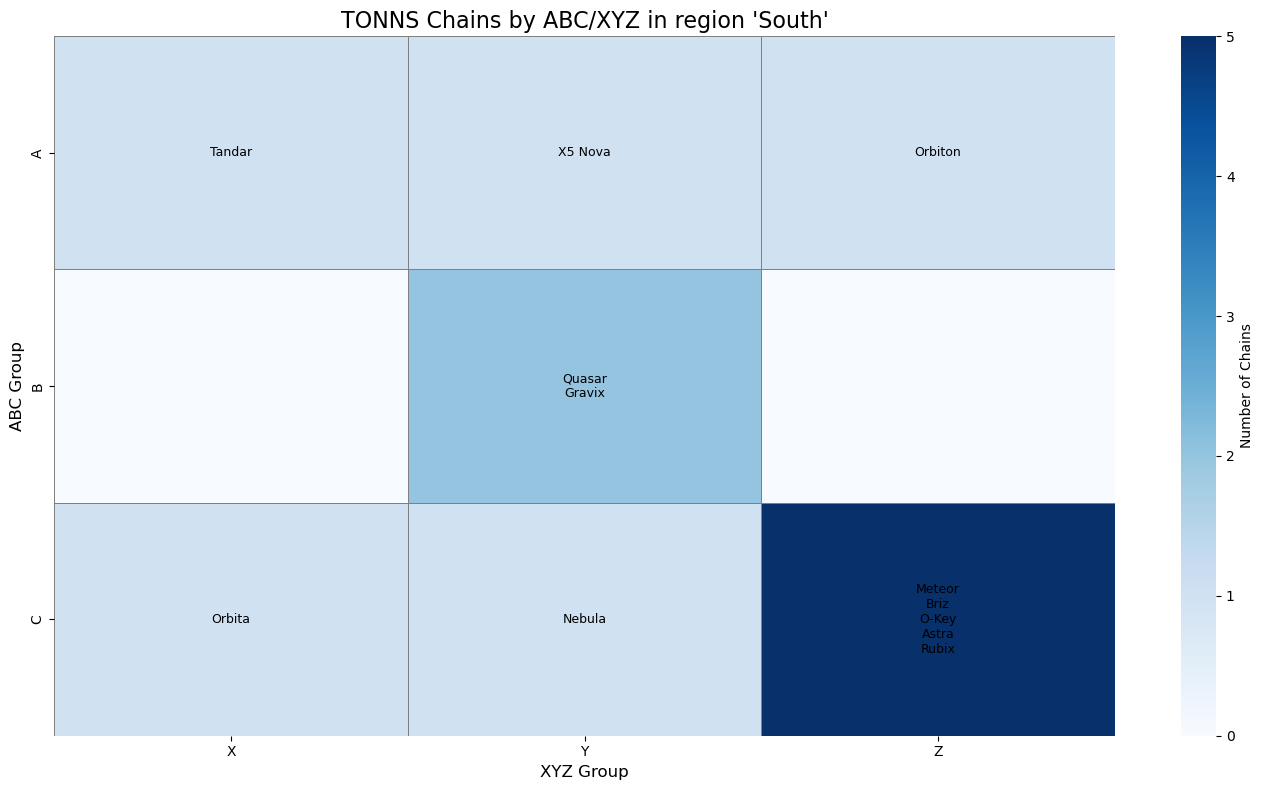

In [780]:
for region, pivots in pivot_per_region.items():
    for measure, pivot in pivots.items():
        counts = pivot.applymap(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)
        pivot_multiline = pivot.applymap(lambda x: '\n'.join(x.split(', ')) if isinstance(x, str) else '')

        plt.figure(figsize=(14, 8))
        plt.title(f"{measure.upper()} Chains by ABC/XYZ in region '{region}'", fontsize=16)

        ax = sns.heatmap(
            counts,
            cmap='Blues',
            cbar_kws={'label': 'Number of Chains'},
            linewidths=0.5,
            linecolor='gray',
            annot=False
        )

        for y in range(pivot_multiline.shape[0]):
            for x in range(pivot_multiline.shape[1]):
                value = pivot_multiline.iloc[y, x]
                if value:
                    ax.text(
                        x + 0.5, y + 0.5, value,
                        ha='center', va='center',
                        fontsize=9, color='black'
                    )

        ax.set_xlabel('XYZ Group', fontsize=12)
        ax.set_ylabel('ABC Group', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

## Conclusion and Business Impact

### Key Outcomes:
1. **Regional ABC/XYZ Segmentation**  
   - Successfully clustered FMCG clients (retail networks) into **profitability-stability matrices** for each operational region  
   - Accounted for regional exclusivity (clients present in only specific regions)  

2. **Actionable Prioritization**  
   - **AX** segments identified as top-priority accounts for premium engagement  
   - **AZ/BZ** clients flagged for stabilization initiatives  
   - **CZ** clusters recommended for resource optimization  

3. **Operational Efficiency**  
   - Enables **data-driven resource allocation**:  
     - Regional sales teams can tailor strategies per cluster  
     - Marketing budgets aligned with client value  
   - Provides framework for **dynamic re-evaluation** (quarterly/annually)  

### Value Delivered:
This analysis transforms raw transaction data into a **strategic decision-making tool**, allowing Jupiter to:  
✅ Maximize ROI from high-value stable clients  
✅ Proactively address revenue volatility risks  
✅ Optimize operational costs by deprioritizing low-value relationships 